# Essential imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Functions 

### MSD 

In [2]:
def computeMSD2(trajectory, t_step):
    
    delays = trajectory.index.copy()
    shifts = np.floor(delays/t_step).astype(np.int)
    msds = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = trajectory - trajectory.shift(-shift)
        sqdist = np.square(diffs)
        msds[i] = sqdist.mean()
    return delays, msds


## Only events 

In [3]:
runs = 19
list_freq = [0.1, 0.2,0.4,0.8]

In [4]:
list_freq

[0.1, 0.2, 0.4, 0.8]

In [9]:
filenames ={}
filenames_sep ={}

for j in list_freq:
    filenames[j] = {}
    filenames_sep[j] = {}

    for i in range(0,runs):
        filenames[j][i] = 'numerics/freq'+ str(j)+'/events_100cells_100barcodes_noise-var0.004_run' + str(i)+'_sin.dat'
        filenames_sep[j][i] = 'numerics/freq'+ str(j)+'/events_100cells_100barcodes_noise-var0.004_run' + str(i)+'_sin_sep.dat'

In [10]:
data_capture = {}
data_capture_sep = {}

for j in list_freq:
    data_capture[j] = {} 
    data_capture_sep[j] = {} 

    for i in range(0,runs):
        print(i)
        data_capture[j][i] = np.loadtxt(filenames[j][i], usecols=(0,1,2,3,4))
        data_capture_sep[j][i] = np.loadtxt(filenames_sep[j][i], usecols=(0,1,2,3,4)) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [11]:
df_capture = {}
df_capture_sep = {}

for j in list_freq:
    df_capture[j] = {}
    df_capture_sep[j] = {}

    for i in range(0,runs):
        df_capture[j][i] = pd.DataFrame(data_capture[j][i])
        df_capture[j][i].columns = ['time(s)', 'capture1(%)', 'capture2(%)', 'capture3(%)', 'capture4(%)']
        
        df_capture_sep[j][i] = pd.DataFrame(data_capture_sep[j][i])
        df_capture_sep[j][i].columns = ['time(s)', 'capture1(%)', 'capture2(%)', 'capture3(%)', 'capture4(%)']

In [12]:
many_data = {}
many_data_sep = {}

for k in list_freq:
    many_data[k] = {}
    many_data_sep[k] = {}

    for j in range(1,5):
        
        many_data[k][j] = pd.concat([df_capture[k][i]['capture'+str(j)+'(%)']
                           for i in range(0,runs) ], 
                          axis=1, 
                          keys=['run'+str(i) for i in range(0,runs)])

        many_data[k][j] = many_data[k][j].set_index(df_capture[k][0]['time(s)']/60.)
        
        many_data_sep[k][j] = pd.concat([df_capture_sep[k][i]['capture'+str(j)+'(%)']
                           for i in range(0,runs) ], 
                          axis=1, 
                          keys=['run'+str(i) for i in range(0,runs)])

        many_data_sep[k][j] = many_data_sep[k][j].set_index(df_capture_sep[k][0]['time(s)']/60.)

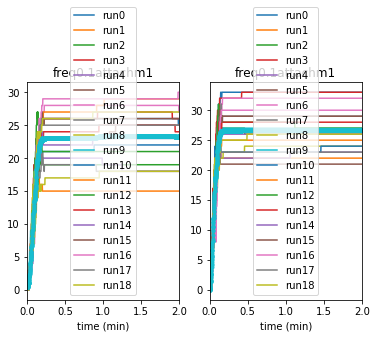

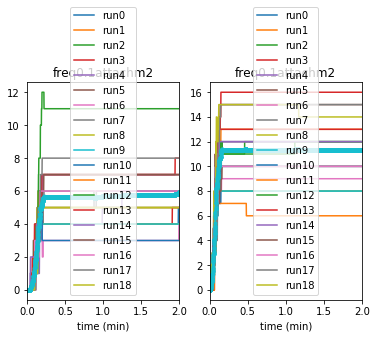

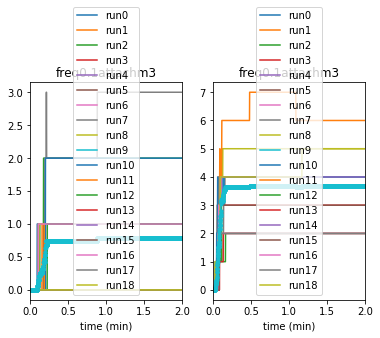

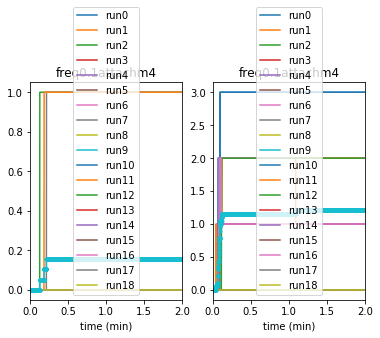

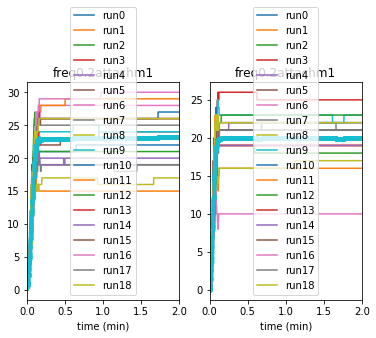

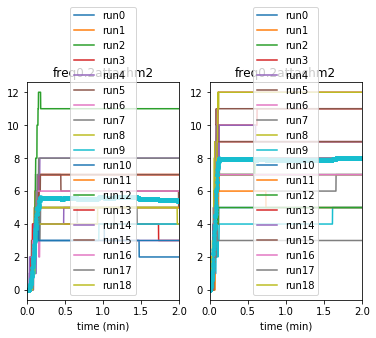

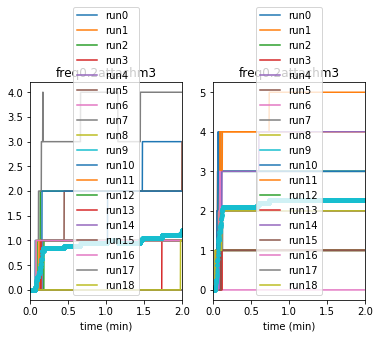

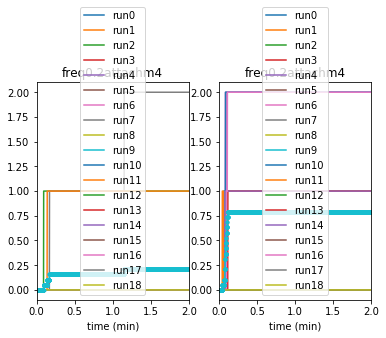

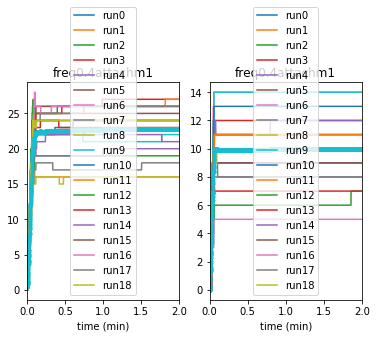

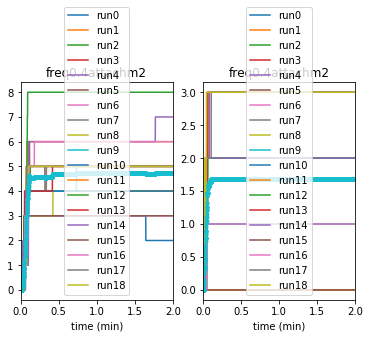

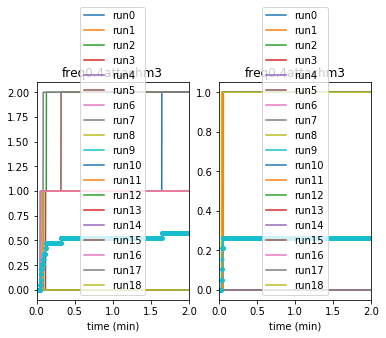

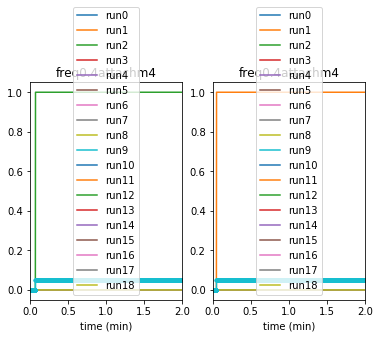

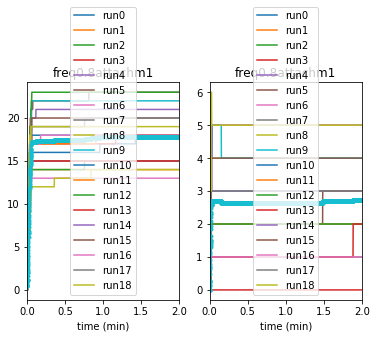

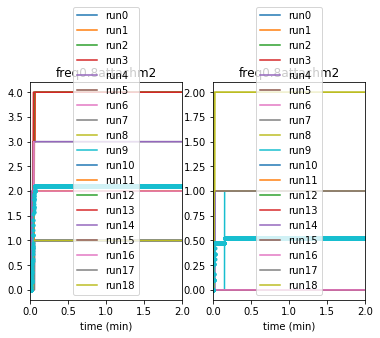

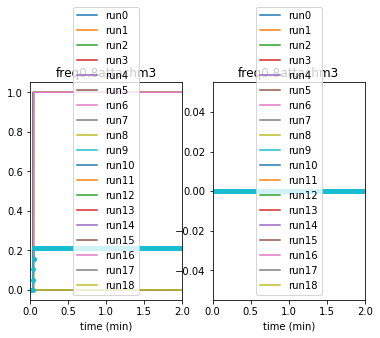

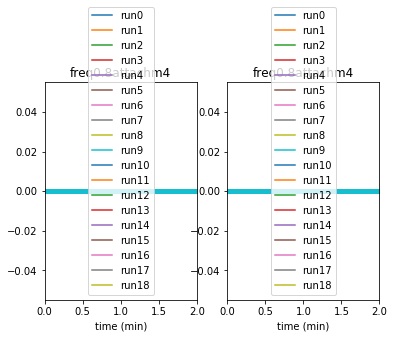

In [13]:

for k in list_freq:
    for i in range(1,5):
        fig = plt.figure()

        ax1 =fig.add_subplot(121)
        many_data[k][i].plot(ax=ax1)
        many_data[k][i].mean(1).plot(ax=ax1, style='.-', title='freq'+str(k)+'attachm'+str(i))
        plt.xlabel('time (min)')
        
        ax2 =fig.add_subplot(122)
        many_data_sep[k][i].plot(ax=ax2)
        many_data_sep[k][i].mean(1).plot(ax=ax2, style='.-', title='freq'+str(k)+'attachm'+str(i))
        plt.xlabel('time (min)')

        plt.show()

In [14]:
many_data[k][i].mean(1).tail(1).values[0]


0.0

In [15]:
media = {}
err = {} 

media_sep = {}
err_sep = {} 

for i in range(1,5):
    
    media[i] = {}
    err[i] = {} 
    
    media_sep[i] = {}
    err_sep[i] = {} 

    for k in list_freq:    
        media[i][k] = list()
        err[i][k] = list()
        media[i][k].append(many_data[k][i].mean(1).tail(1).values[0] )
        err[i][k].append(many_data[k][i].std(1).tail(1).values[0] )

        media_sep[i][k] = list()
        err_sep[i][k] = list()
        media_sep[i][k].append(many_data_sep[k][i].mean(1).tail(1).values[0] )
        err_sep[i][k].append(many_data_sep[k][i].std(1).tail(1).values[0] )


In [16]:
result = pd.concat( [ 
pd.concat( [ 
    pd.DataFrame( media[i] ).transpose().rename(columns={0:'mean'}),
    pd.DataFrame( err[i] ).transpose().rename(columns={0:'std'})
], axis=1)
 for i in range(1,5) ], axis=1, keys=[i for i in range(1,5)])

In [17]:
result_sep = pd.concat( [ 
pd.concat( [ 
    pd.DataFrame( media_sep[i] ).transpose().rename(columns={0:'mean'}),
    pd.DataFrame( err_sep[i] ).transpose().rename(columns={0:'std'})
], axis=1)
 for i in range(1,5) ], axis=1, keys=[i for i in range(1,5)])

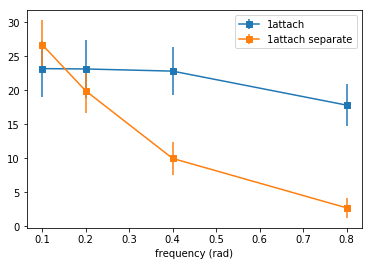

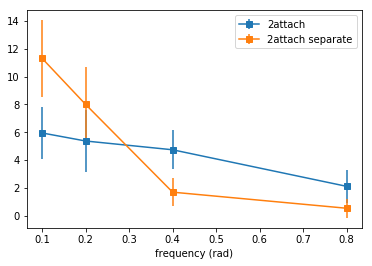

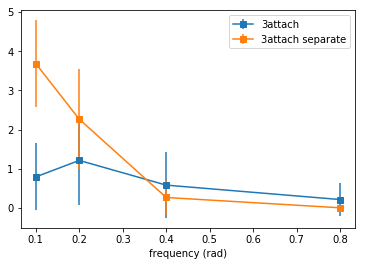

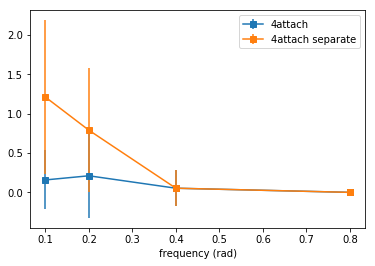

In [20]:
for i in range(1,5):
    
    fig = plt.figure()
    #ax1 = fig.add_subplot(121)
    plt.errorbar( result[i]['mean'].index, result[i]['mean'].values, result[i]['std'].values, marker='s', 
                 label=str(i)+'attach' )
    
    plt.xlabel('frequency (rad)')
    #ax.set_ylabel('% of total number of cells')

    #ax2 = fig.add_subplot(122)
    plt.errorbar( result_sep[i]['mean'].index, result_sep[i]['mean'].values, result_sep[i]['std'].values, marker='s',
                 label=str(i)+'attach separate' )
    
    plt.legend()
    plt.show()

In [21]:
pd.concat( [pd.concat( [ pd.DataFrame( media[i] ).transpose().rename(columns={0:'mean'+str(i)})  for i in range(1,5) ] , axis=1 )
, pd.concat( [ pd.DataFrame( err[i] ).transpose().rename(columns={0:'std'+str(i)})  for i in range(1,5) ] , axis=1 )
           ], axis=1)

mean1     mean2     mean3     mean4      std1      std2      std3  \
0.1  23.210526  5.947368  0.789474  0.157895  4.130899  1.870047  0.854982   
0.2  23.157895  5.368421  1.210526  0.210526  4.219836  2.216367  1.134262   
0.4  22.842105  4.736842  0.578947  0.052632  3.563132  1.407997  0.837708   
0.8  17.842105  2.105263  0.210526  0.000000  3.131616  1.196975  0.418854   

         std4  
0.1  0.374634  
0.2  0.535303  
0.4  0.229416  
0.8  0.000000

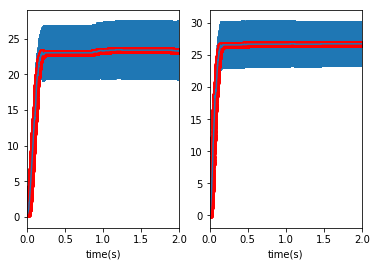

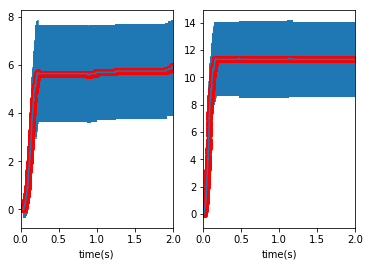

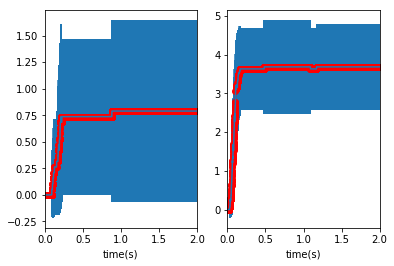

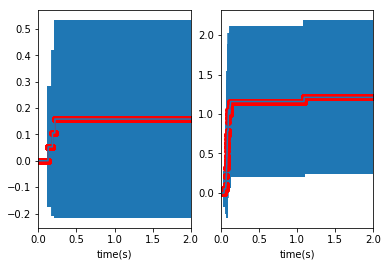

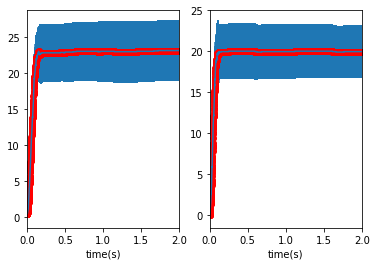

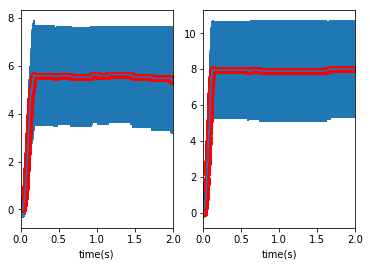

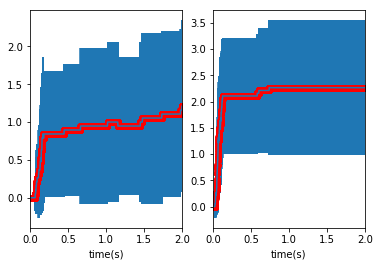

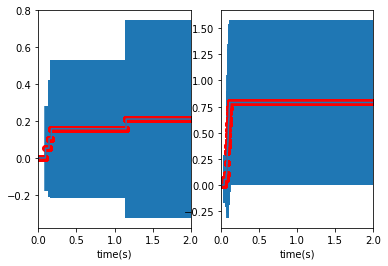

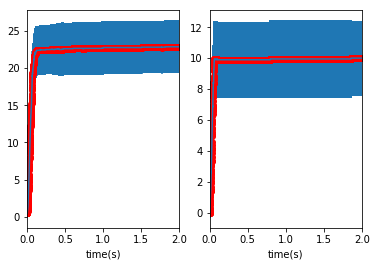

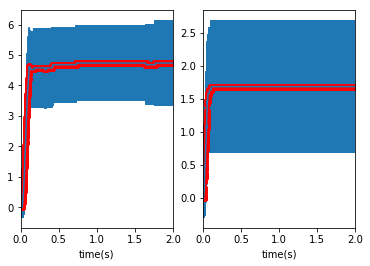

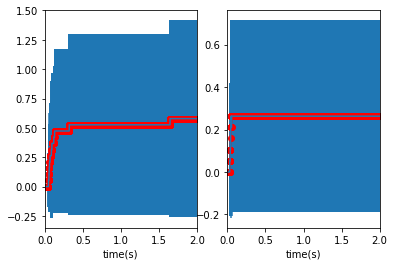

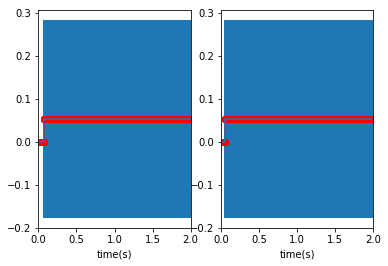

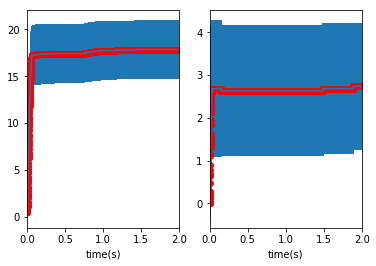

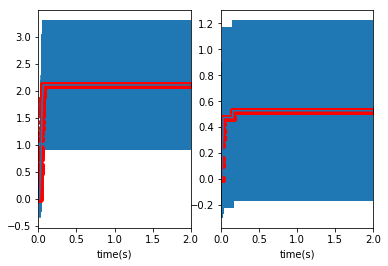

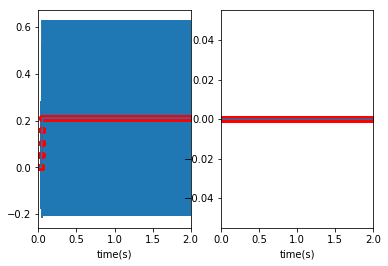

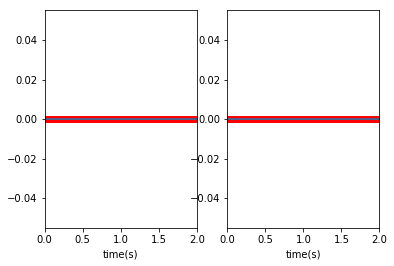

In [22]:
for k in list_freq:
    for i in range(1,5):
        
        fig = plt.figure()

        ax1 =fig.add_subplot(121)

        plt.errorbar(many_data[k][i].mean(1).index.values, many_data[k][i].mean(1).values, many_data[k][i].std(1) )
        many_data[k][i].mean(1).plot(ax=ax1, style='ro-')
        
        ax2 =fig.add_subplot(122)

        plt.errorbar(many_data_sep[k][i].mean(1).index.values, many_data_sep[k][i].mean(1).values, many_data_sep[k][i].std(1) )
        many_data_sep[k][i].mean(1).plot(ax=ax2, style='ro-')

        
    plt.show()

In [23]:
many_data.keys()

dict_keys([0.1, 0.2, 0.4, 0.8])

In [24]:
means = {}
error ={}

means_sep = {}
error_sep ={}

for k in list_freq:
    # Create lists for the plot
    att = ['1attachment', '2attachments', '3attachments', '4attachments']
    x_pos = np.arange(len(att))

    means[k] = list() 
    error[k] = list() 
    
    means_sep[k] = list() 
    error_sep[k] = list() 

    for i in range(1,5):
        means[k].append(many_data[k][i].mean(1).tail(1).values[0])
        error[k].append(many_data[k][i].std(1).tail(1).values[0])

        means_sep[k].append(many_data_sep[k][i].mean(1).tail(1).values[0])
        error_sep[k].append(many_data_sep[k][i].std(1).tail(1).values[0])


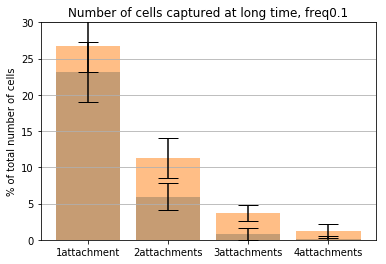

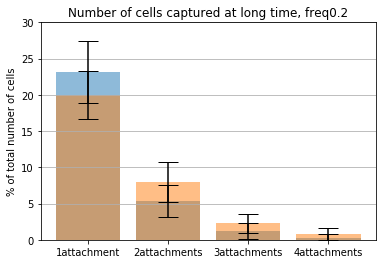

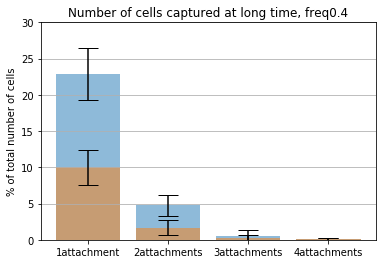

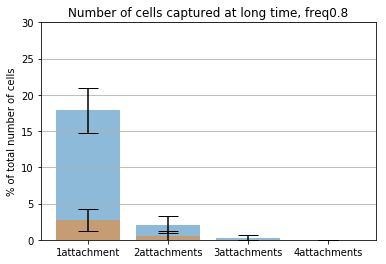

In [25]:
for k in list_freq:

    fig, ax = plt.subplots()
    ax.bar(x_pos, means[k], yerr=error[k], align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.bar(x_pos, means_sep[k], yerr=error_sep[k], align='center', alpha=0.5, ecolor='black', capsize=10)

    ax.set_ylabel('% of total number of cells')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(att)
    ax.set_ylim(0,30)

    ax.set_title('Number of cells captured at long time, freq'+str(k))
    ax.yaxis.grid(True)


# OLD 

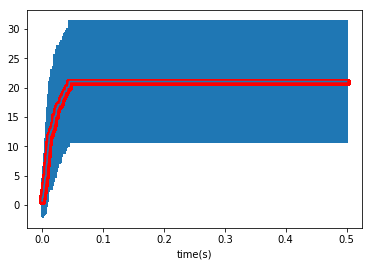

In [122]:
plt.errorbar(many_data.mean(1).index.values, many_data.mean(1).values, many_data.std(1) )
many_data.mean(1).plot(style='ro-')

## Wylie Data Analysis

In [162]:
filenames ={}
for i in range(1,11):
    filenames[i] = 'Dropbox/Wylie/Experiments1disk/run' + str(i) + '/coords_centre-etc2.dat'

In [163]:
filenames

{1: 'Dropbox/Wylie/Experiments1disk/run1/coords_centre-etc2.dat',
 2: 'Dropbox/Wylie/Experiments1disk/run2/coords_centre-etc2.dat',
 3: 'Dropbox/Wylie/Experiments1disk/run3/coords_centre-etc2.dat',
 4: 'Dropbox/Wylie/Experiments1disk/run4/coords_centre-etc2.dat',
 5: 'Dropbox/Wylie/Experiments1disk/run5/coords_centre-etc2.dat',
 6: 'Dropbox/Wylie/Experiments1disk/run6/coords_centre-etc2.dat',
 7: 'Dropbox/Wylie/Experiments1disk/run7/coords_centre-etc2.dat',
 8: 'Dropbox/Wylie/Experiments1disk/run8/coords_centre-etc2.dat',
 9: 'Dropbox/Wylie/Experiments1disk/run9/coords_centre-etc2.dat',
 10: 'Dropbox/Wylie/Experiments1disk/run10/coords_centre-etc2.dat'}

In [164]:
data = {}
for i in range(1,11):
    print(i)
    data[i] = np.loadtxt(filenames[i], usecols=(0,1,2)) 

1
2
3
4
5
6
7
8
9
10


In [165]:
df = {}
for i in range(1,11):
    df[i] = pd.DataFrame(data[i]).replace(0.0, np.nan)
    df[i].columns = ['frame', 'X', 'Y']

Text(0.5,0,'frame')

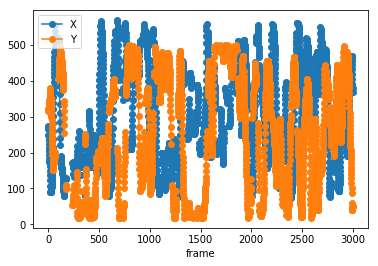

In [166]:
df[3][['X', 'Y']].plot(marker = 'o')

plt.xlabel('frame')

In [167]:
many_data = pd.concat([df[i] for i in range(1,11) ], axis=1, keys=['run'+str(i) for i in range(1,11)])

In [168]:
len(many_data['run7'].dropna())

2547

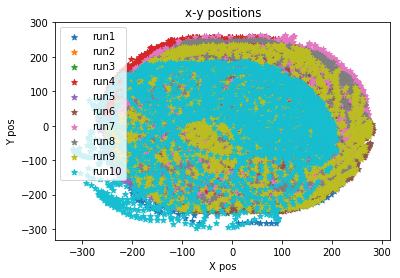

In [169]:
for i in range(1,11):
    plt.scatter( many_data['run'+str(i)]['X'] - many_data['run'+str(i)]['X'].mean(),
                many_data['run'+str(i)]['Y'] -many_data['run'+str(i)]['Y'].mean() , marker= '*', label='run'+str(i))
    plt.ylabel('Y pos')
    plt.xlabel('X pos')
    plt.title('x-y positions')
    plt.legend()

In [170]:
len( many_data['run'+str(run)].loc[:n] ) - len( many_data['run'+str(run)].loc[:n].dropna() )

12

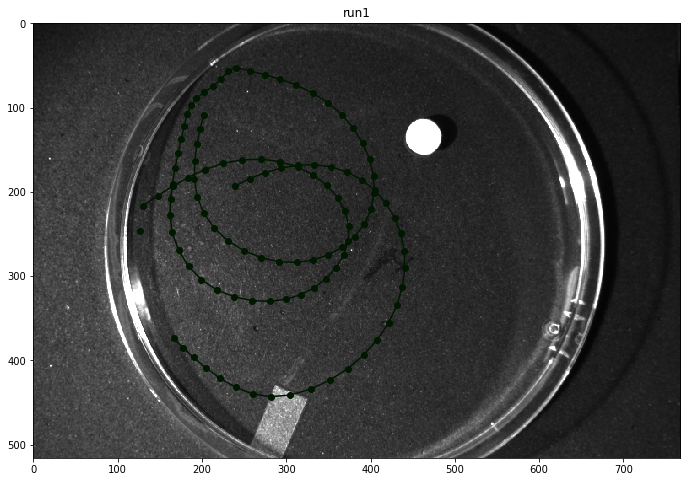

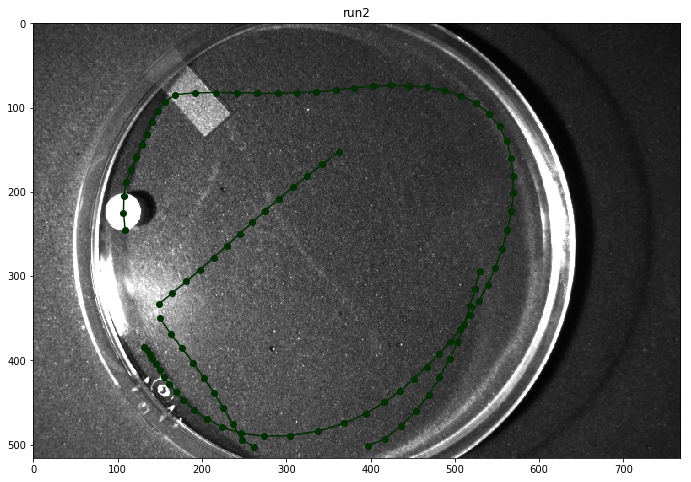

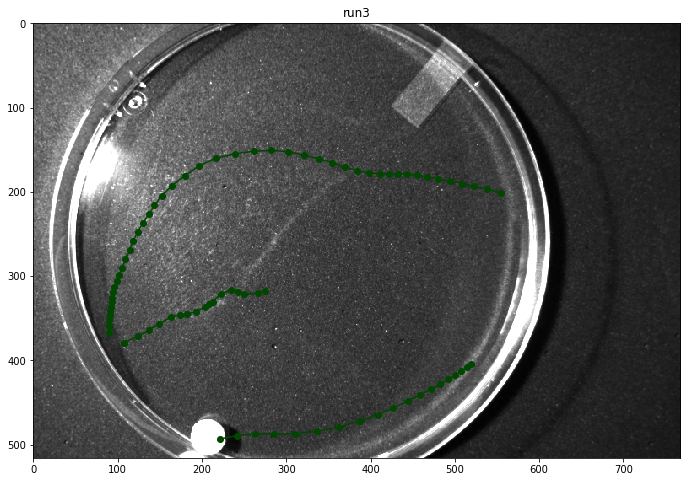

Oops!  That was no valid number.  Try again...


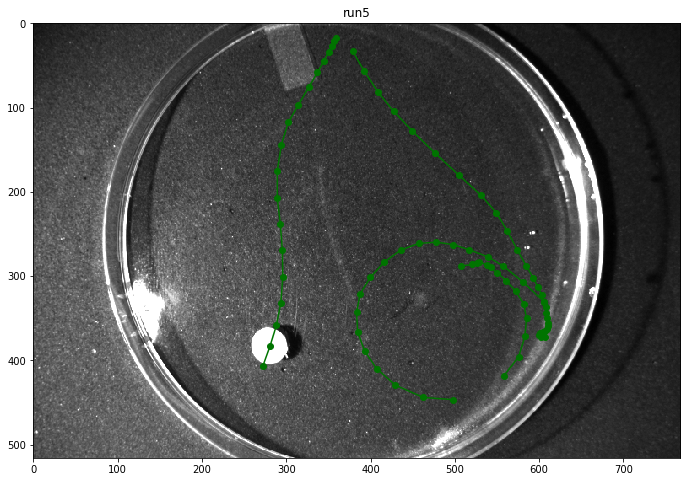

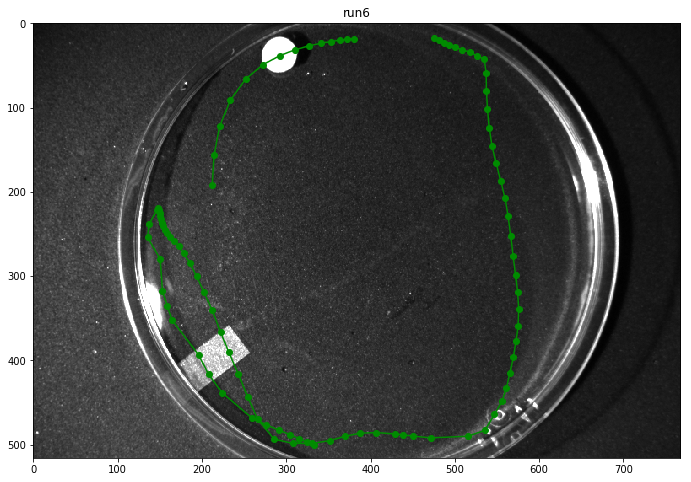

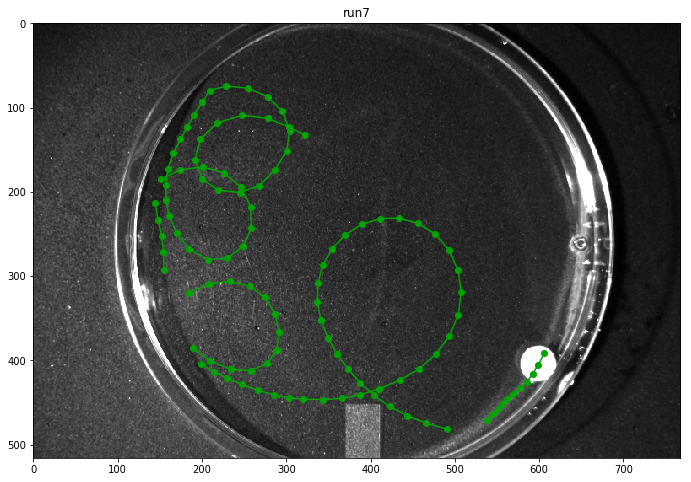

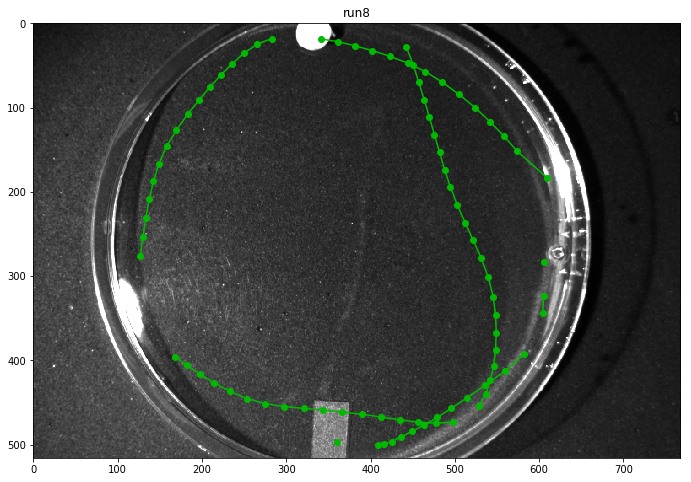

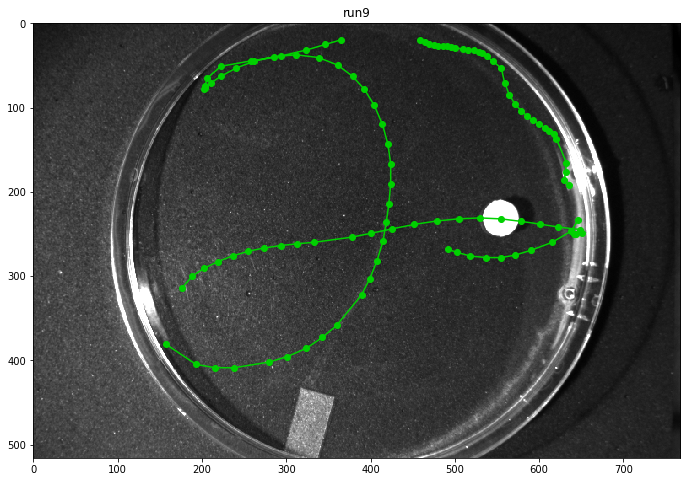

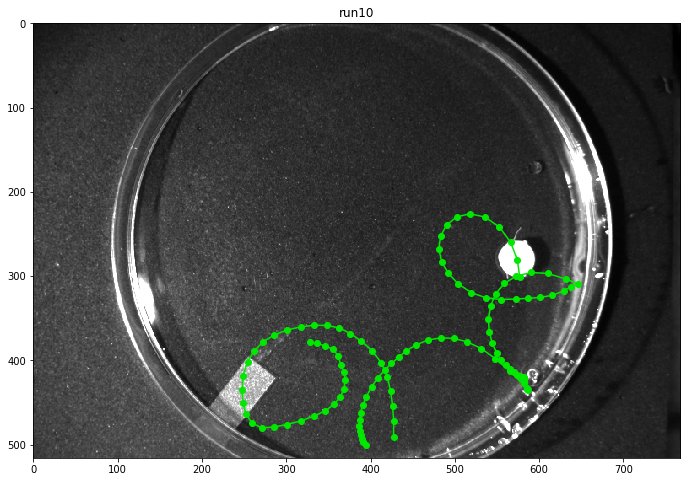

In [910]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
n = 120

for i in range(1,11):
    run = i
    #img = mpimg.imread('/Users/marcol/Dropbox/Wylie/'+str(run)+'/'+str(n)+'.tiff')
    try: 
        img = mpimg.imread('/Users/marcol/Dropbox/Wylie/'+str(run)+'/'+str(n)+'.tiff')

        plt.figure(figsize=[16,8])
        plt.imshow(img, cmap="gray")
    #N = len(many_data['run'+str(run)].loc[:n] ) - len(many_data['run'+str(run)].loc[:n].dropna() )
    #print('NaN:'+str(N) )
    #plt.plot( many_data['run'+str(run)]['X'].loc[:n] , many_data['run'+str(run)]['Y'].loc[:n], 'bo-' )
        plt.plot( df[run]['X'].loc[:n] , df[run]['Y'].loc[:n], 'o-',  color = (0, i /11.0, 0, 1) )
        plt.title('run'+str(run) )
        plt.show()
    except IOError: print("Oops!  That was no valid number.  Try again...")

In [172]:
from scipy.stats import kde


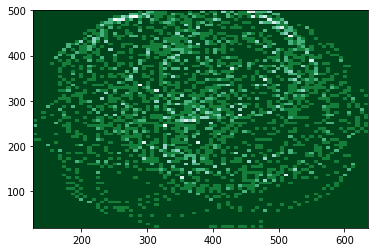

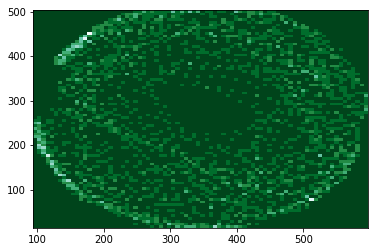

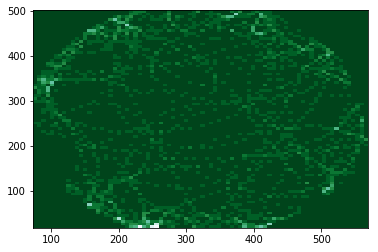

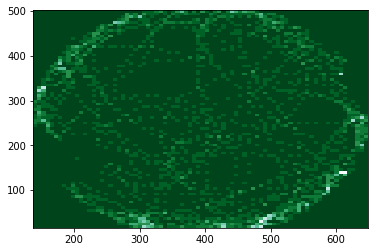

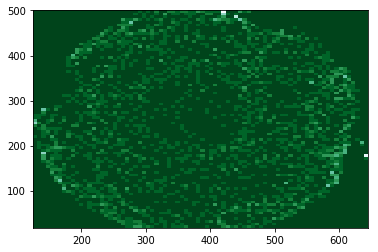

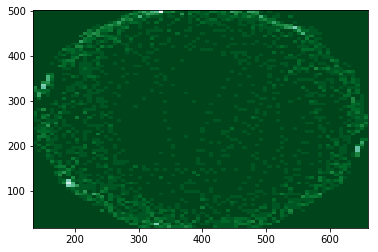

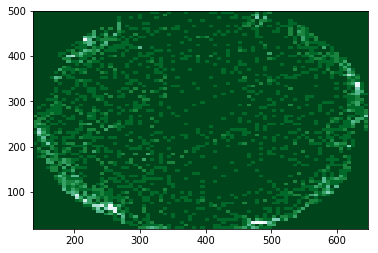

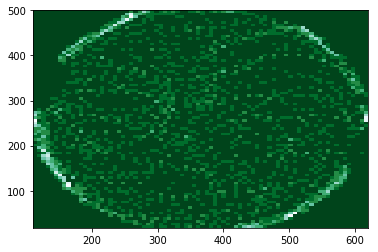

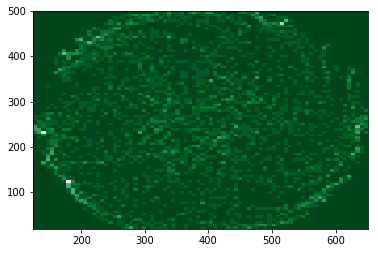

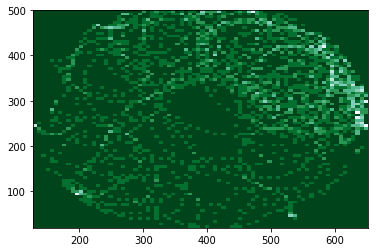

In [173]:
for i in range(1,11):
    x =  many_data['run'+str(i)]['X'].dropna()
    y =  many_data['run'+str(i)]['Y'].dropna()
    
    plt.hist2d(x, y, bins=80, cmap=plt.cm.BuGn_r) #2D histo

    
    
    plt.show()

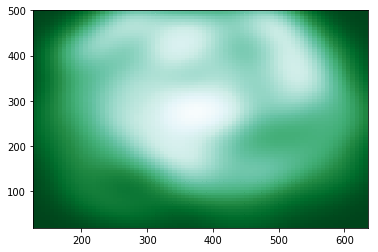

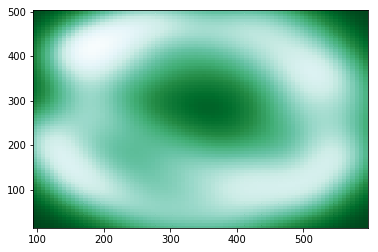

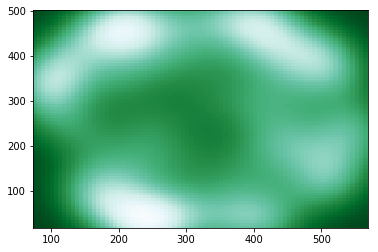

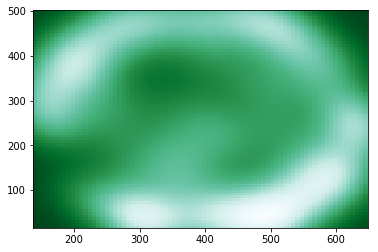

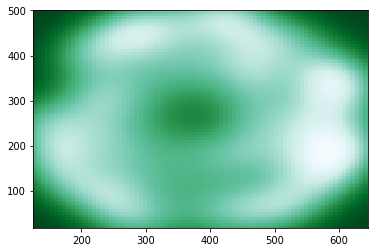

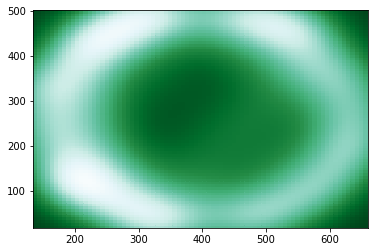

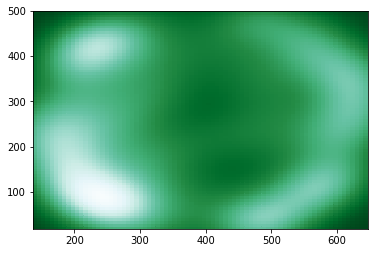

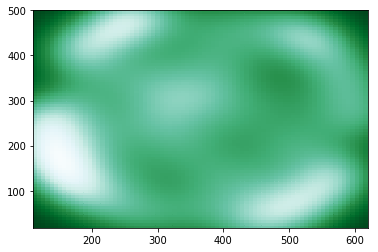

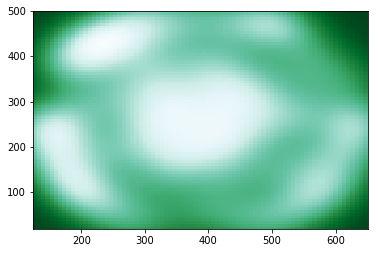

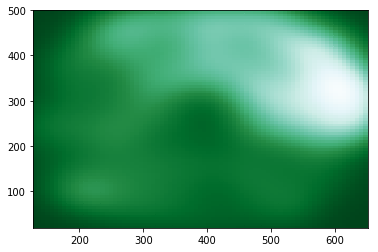

In [14]:

for i in range(1,11):
    x =  many_data['run'+str(i)]['X'].dropna()
    y =  many_data['run'+str(i)]['Y'].dropna()
    
    #plt.hist2d(x, y, bins=80, cmap=plt.cm.BuGn_r) #2D histo
    data = pd.concat([x, y], axis=1)
    nbins=80
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)

    
    
    plt.show()

In [174]:
Radial_pos = {}
for i in range(1,11):
    Radial_pos[i] =  np.sqrt( (df[i]['X']-df[i]['X'].mean())**2 + (df[i]['Y']-df[i]['Y'].mean())**2) 

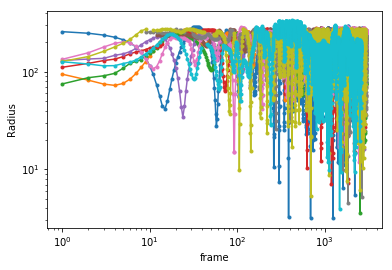

In [175]:
for i in range(1,11):
    Radial_pos[i].plot(marker='.')
    
plt.ylabel('Radius')
plt.xlabel('frame')
plt.yscale('log')
plt.xscale('log')

In [176]:
tempo ={}
for i in range(1,11):
    tempo[i] = np.arange(len(Radial_pos[i]) )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


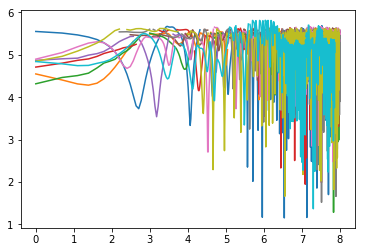

In [177]:

for i in range(1,11):
    plt.plot(np.log(tempo[i]), np.log(Radial_pos[i]) )


In [178]:
Radial_pos_df = pd.concat([Radial_pos[i] for i in range(1,11)], axis=1, keys=['run'+str(i) for i in range(1,11)])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdf7240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de5dbe0>]], dtype=object)

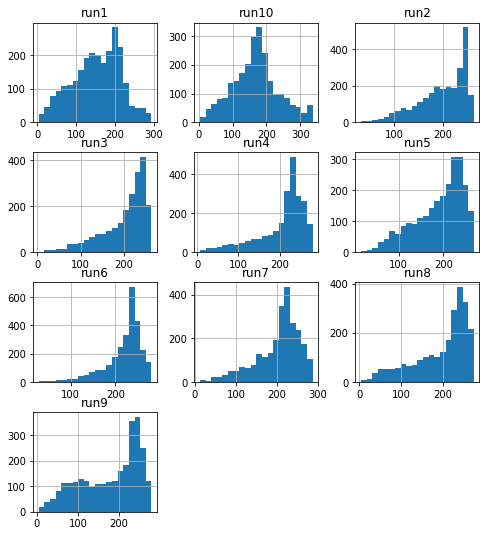

In [179]:
Radial_pos_df.hist(bins=20, figsize=[8,9])

## average over 10 realizations 

In [376]:
r_pos = {}
binn = 30
for i in range(1,11):
    r_pos[i] = pd.concat([ pd.DataFrame( np.histogram(Radial_pos[i].dropna(), bins=binn )[1], columns={'bins'} ),
           pd.DataFrame( np.histogram(Radial_pos[i].dropna() ,bins=binn )[0] , columns={'count'}) 
                                            ], axis=1).set_index('bins')


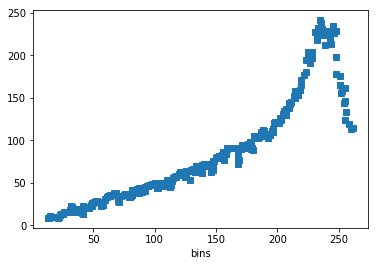

In [378]:
pd.concat(r_pos, axis=1).mean(1).rolling(10).mean().plot(style='s')



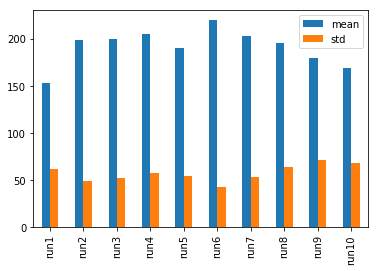

In [379]:
R_mean_std = pd.DataFrame({'mean': [Radial_pos[i].mean() for i in range(1,11)], 
                          'std': [Radial_pos[i].std() for i in range(1,11)], 
              #index = ['run'+str(i) for i in range(2,11)]
             })
R_mean_std = R_mean_std.set_index(Radial_pos_df.keys() )

R_mean_std.plot(kind='bar')

In [380]:
def get_theta(Y, X):
    return np.arctan(Y/X)

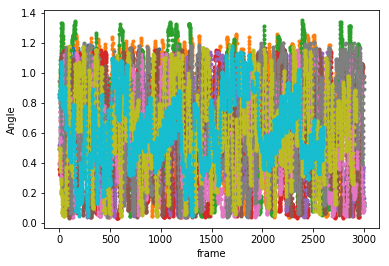

In [381]:
theta = {}
for i in range(1,11):
    theta[i] = get_theta( df[i]['Y'], df[i]['X'])
    
    theta[i].plot(marker='.')

    plt.ylabel('Angle')
    plt.xlabel('frame')




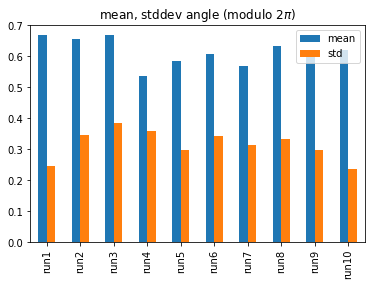

In [382]:
theta_mean_std = pd.DataFrame({'mean': [theta[i].mean() for i in range(1,11)], 
                          'std': [theta[i].std() for i in range(1,11)], 
              #index = ['run'+str(i) for i in range(2,11)]
             })
theta_mean_std = theta_mean_std.set_index(Radial_pos_df.keys() )

theta_mean_std.plot(kind='bar', title='mean, stddev angle (modulo 2$\pi$)')

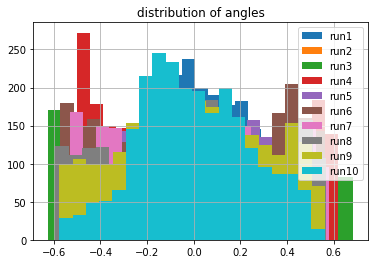

In [383]:
for i in range(1,11):
    (theta[i]-theta[i].mean()).hist(bins=20, label='run'+str(i))
    plt.title('distribution of angles')
    plt.legend()

In [384]:
theta_df = pd.concat( [ theta[i] for i in range(1,11)], axis=1, keys=['run'+str(i) for i in range(1,11)] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25df52e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a262dda90>]], dtype=object)

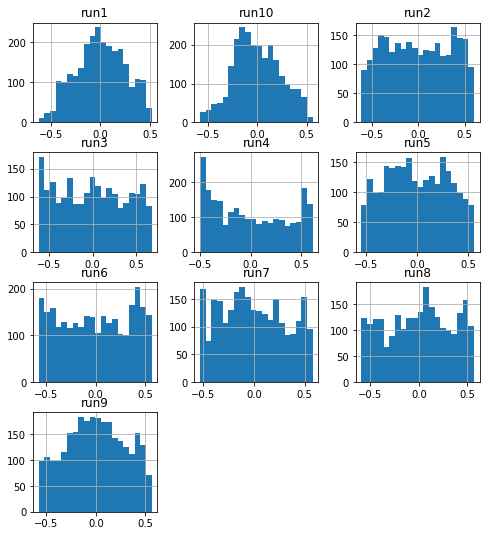

In [385]:
#plt.title('angular distribution')
(theta_df-theta_df.mean() ).hist(bins=20, figsize=[8,9])


## average over 10 realizations 

In [386]:
ang_pos = {}

for i in range(1,11):
    ang_pos[i] = pd.concat([ pd.DataFrame( np.histogram((theta[i]-theta[i].mean()).replace(0, np.nan).dropna(), bins=30 )[1], columns={'bins'} ),
           pd.DataFrame( np.histogram((theta[i]-theta[i].mean()).replace(0, np.nan).dropna() ,bins=30 )[0] , columns={'count'}) 
                                            ], axis=1).set_index('bins')


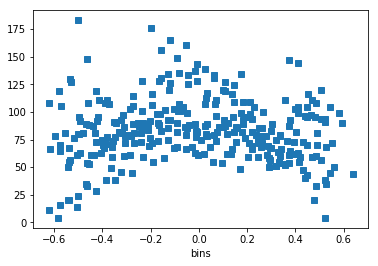

In [911]:
pd.concat(ang_pos, axis=1).mean(1).rolling(1).mean().plot(style='s')

In [199]:
def get_ang_vel(data_df, X, Y):
    
    Rx = X-X.mean()
    Ry = Y-Y.mean()
    R_sq = ( Rx**2 + Ry**2)
    V = (Rx)*(Y.diff()/data_df['frame'].diff())- (Ry)*(X.diff()/data_df['frame'].diff())
    V_norm = V/R_sq
    return pd.concat( [data_df['frame'],  V_norm ], axis=1, keys=['frame', 'ang_vel'] )

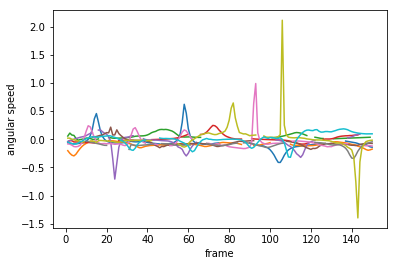

In [200]:
ang_vel ={}
for i in range(1,11): 
    ang_vel[i] = get_ang_vel(df[i], df[i]['X'], df[i]['Y']) 
    
    ang_vel[i]['ang_vel'].loc[:150].plot()
    plt.ylabel('angular speed')
    plt.xlabel('frame')


In [201]:
ang_vel_df = pd.concat([ ang_vel[i]['ang_vel'].clip(-1,1) for i in range(1,11)], axis=1, keys=['run'+str(i) for i in range(1,11)])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f90a550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a20166dd8>]], dtype=object)

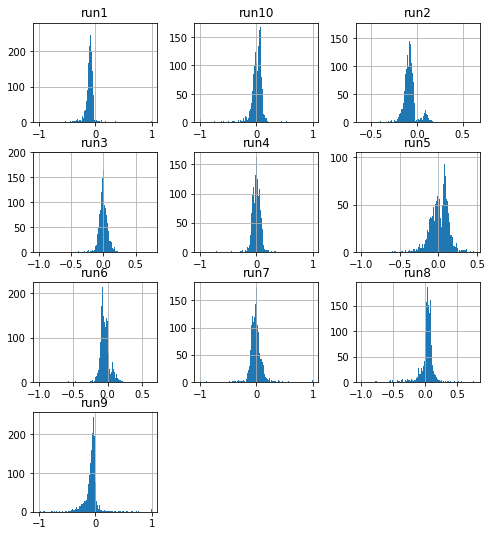

In [202]:
ang_vel_df.hist(bins=200, figsize=[8,9])

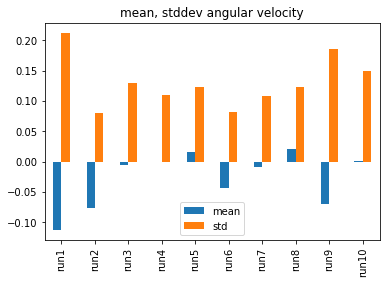

In [204]:
ang_vel_mean_std = pd.DataFrame({'mean': [ang_vel[i]['ang_vel'].mean() for i in range(1,11)], 
                          'std': [ang_vel[i]['ang_vel'].std() for i in range(1,11)], 
              #index = ['run'+str(i) for i in range(2,11)]
             })
ang_vel_mean_std = ang_vel_mean_std.set_index(Radial_pos_df.keys() )

ang_vel_mean_std.plot(kind='bar', title='mean, stddev angular velocity')

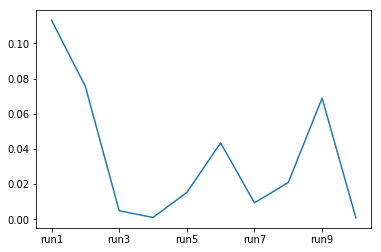

In [205]:
ang_vel_mean_std['mean'].abs().plot()

In [33]:
def get_radial_vel(data_df, R):
    return  R.diff()/data_df['frame'].diff()


In [34]:
Radial_pos[1].diff().index.values

array([   0,    1,    2, ..., 2692, 2693, 2694])

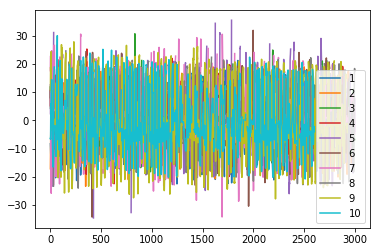

In [35]:
radial_vel = {}
for i in range(1,11): 
    radial_vel[i] = get_radial_vel(df[i], Radial_pos[i])
    
    radial_vel[i].plot(label=i)
    plt.legend()


    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c8de438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1cbed358>]], dtype=object)

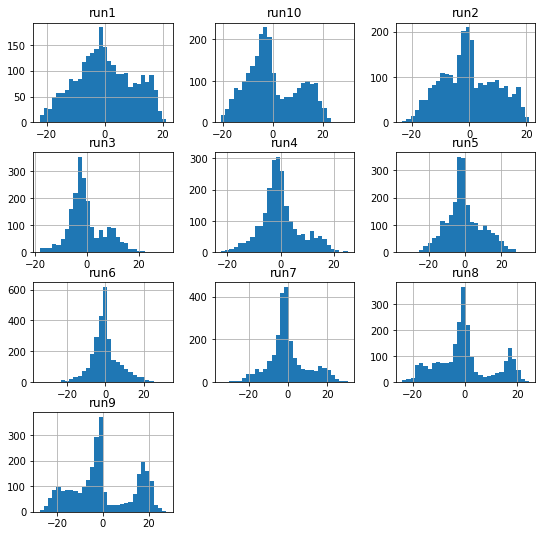

In [36]:
pd.concat([radial_vel[i] for i in range(1,11)], axis=1, keys=['run'+str(i) for i in range(1,11)]).hist(bins=30, 
                                                                                                       figsize=[9,9])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c694fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d214c18>]], dtype=object)

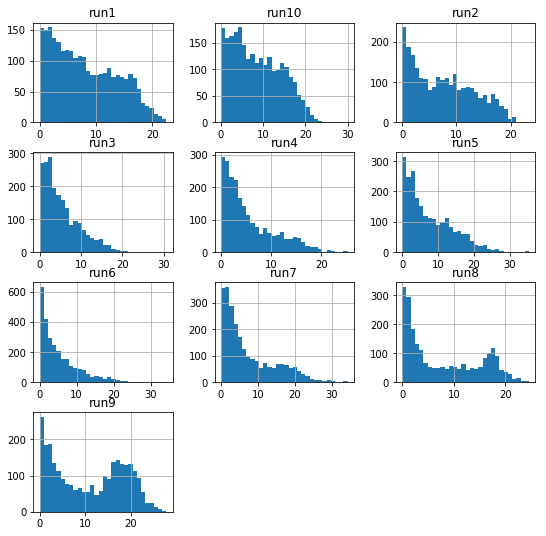

In [37]:
pd.concat([radial_vel[i].abs() for i in range(1,11)], axis=1, keys=['run'+str(i) for i in range(1,11)]).hist(bins=30, 
                                                                                                       figsize=[9,9])

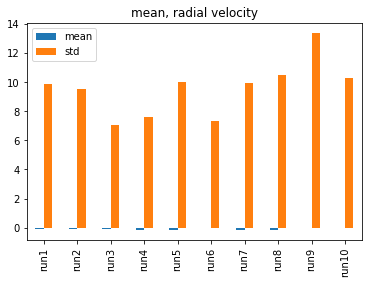

In [38]:
radial_vel_mean_std = pd.DataFrame({'mean': [radial_vel[i].mean() for i in range(1,11)], 
                          'std': [radial_vel[i].std() for i in range(1,11)], 
             })
radial_vel_mean_std = radial_vel_mean_std.set_index(Radial_pos_df.keys() )

radial_vel_mean_std.plot(kind='bar', title='mean, radial velocity')
#plt.yscale('log')

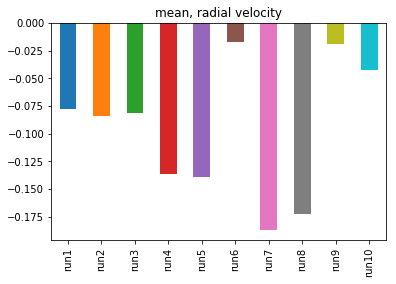

In [39]:
radial_vel_mean_std['mean'].plot(kind='bar', title='mean, radial velocity')


In [40]:
many_data['run'+str(2)]

frame           X           Y
0      35.0  362.022033  152.294954
1      36.0  342.507812  167.301847
2      37.0  324.492430  181.374910
3      38.0  307.513978  194.555556
4      39.0  291.069364  208.275289
5      40.0  275.171326  222.087455
6      41.0  259.722222  235.823232
7      42.0  244.514161  249.847495
8      43.0  229.197691  263.901154
9      44.0  213.653929  278.033165
10     45.0  197.854572  292.194384
11     46.0  181.536119  306.116147
12     47.0  164.570365  320.096752
13     48.0  148.515007  333.318554
14     49.0         NaN         NaN
15     50.0         NaN         NaN
16     51.0         NaN         NaN
17     52.0         NaN         NaN
18     53.0         NaN         NaN
19     54.0         NaN         NaN
20     55.0  130.869418  384.579838
21     56.0  134.521709  388.156444
22     57.0  137.651536  392.775838
23     58.0  140.910479  398.190146
24     59.0  144.877537  404.335199
25     60.0  149.599446  411.814276
26     61.0  154.594480  419.143666
27     62.0  160.652268  427.516199
28     63.0  168.633285  437.273055
29     64.0  177.851826  447.446589
...     ...         ...         ...
2970    NaN         NaN         NaN
2971    NaN         NaN         NaN
2972    NaN         NaN         NaN
2973    NaN         NaN         NaN
2974    NaN         NaN         NaN
2975    NaN         NaN         NaN
2976    NaN         NaN         NaN
2977    NaN         NaN         NaN
2978    NaN         NaN         NaN
2979    NaN         NaN         NaN
2980    NaN         NaN         NaN
2981    NaN         NaN         NaN
2982    NaN         NaN         NaN
2983    NaN         NaN         NaN
2984    NaN         NaN         NaN
2985    NaN         NaN         NaN
2986    NaN         NaN         NaN
2987    NaN         NaN         NaN
2988    NaN         NaN         NaN
2989    NaN         NaN         NaN
2990    NaN         NaN         NaN
2991    NaN         NaN         NaN
2992    NaN         NaN         NaN
2993    NaN         NaN         NaN
2994    NaN         NaN         NaN
2995    NaN         NaN         NaN
2996    NaN         NaN         NaN
2997    NaN         NaN         NaN
2998    NaN         NaN         NaN
2999    NaN         NaN         NaN

[3000 rows x 3 columns]

In [41]:
pd.Series(many_data['run'+str(i)]['frame'].diff().values)

0       NaN
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
2970    NaN
2971    NaN
2972    NaN
2973    NaN
2974    NaN
2975    NaN
2976    NaN
2977    NaN
2978    NaN
2979    NaN
2980    NaN
2981    NaN
2982    NaN
2983    NaN
2984    NaN
2985    NaN
2986    NaN
2987    NaN
2988    NaN
2989    NaN
2990    NaN
2991    NaN
2992    NaN
2993    NaN
2994    NaN
2995    NaN
2996    NaN
2997    NaN
2998    NaN
2999    NaN
Length: 3000, dtype: float64

In [208]:
many_data['run'+str(i)][['X', 'Y']].diff().div( pd.Series(many_data['run'+str(i)]['frame'].diff().values), axis=0)

X          Y
0           NaN        NaN
1     -4.575306  16.141735
2     -3.845912  18.400943
3     -2.594877  20.664779
4     -0.255512  21.326504
5      3.174264  20.655816
6      7.935402  19.664705
7     12.308732  17.510547
8     15.921864  14.740442
9     19.084110  11.860201
10    20.970077   8.515044
11    21.417795   4.752340
12    20.531536   0.725073
13    19.221112  -2.709485
14    17.923071  -6.109098
15    16.743651  -9.202685
16    14.787493 -12.488533
17    11.651633 -15.228440
18     7.902699 -17.472745
19     3.620110 -19.216429
20    -0.708017 -19.970232
21    -4.586570 -19.806404
22    -8.243436 -19.209707
23   -11.237546 -18.035662
24   -13.926640 -15.999028
25   -16.250650 -13.910821
26   -18.190185 -11.738011
27   -19.243603  -9.351580
28   -18.880726  -6.929451
29   -18.337080  -5.302663
...         ...        ...
2970        NaN        NaN
2971        NaN        NaN
2972        NaN        NaN
2973        NaN        NaN
2974        NaN        NaN
2975        NaN        NaN
2976        NaN        NaN
2977        NaN        NaN
2978        NaN        NaN
2979        NaN        NaN
2980        NaN        NaN
2981        NaN        NaN
2982        NaN        NaN
2983        NaN        NaN
2984        NaN        NaN
2985        NaN        NaN
2986        NaN        NaN
2987        NaN        NaN
2988        NaN        NaN
2989        NaN        NaN
2990        NaN        NaN
2991        NaN        NaN
2992        NaN        NaN
2993        NaN        NaN
2994        NaN        NaN
2995        NaN        NaN
2996        NaN        NaN
2997        NaN        NaN
2998        NaN        NaN
2999        NaN        NaN

[3000 rows x 2 columns]

In [209]:
speed = {}

for i in range(1,11):
    speed[i] = many_data['run'+str(i)][['X', 'Y']].diff().div( pd.Series(many_data['run'+str(i)]['frame'].diff().values), axis=0)


In [210]:
def get_sq_speed(X, Y):
    return (X**2 + Y**2)**0.5


In [211]:
sq_speed = {}

for i in range(1,11):
    sq_speed[i] = get_sq_speed(speed[i]['X'], speed[i]['Y'])

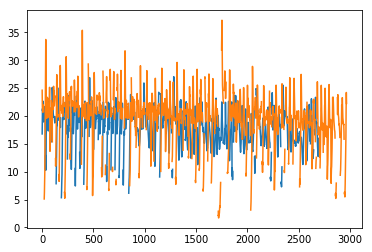

In [212]:
sq_speed[1].plot()
sq_speed[2].plot()


In [213]:
R_sq_speed = {}
R_sq_speed_centre = {}
R_sq_speed_boundary = {}

for i in range(1,11):
    R_sq_speed[i] = pd.concat([Radial_pos[i], sq_speed[i]], axis=1, keys=['R', 'v_sq'])
    R_sq_speed_centre[i] = R_sq_speed[i].loc[R_sq_speed[i]['R']<200]
    R_sq_speed_boundary[i] = R_sq_speed[i].loc[R_sq_speed[i]['R']>200]

In [214]:
R_sq_speed_boundary_df = pd.concat(R_sq_speed_boundary, axis=1)
R_sq_speed_centre_df = pd.concat(R_sq_speed_centre, axis=1)


In [215]:
import matplotlib

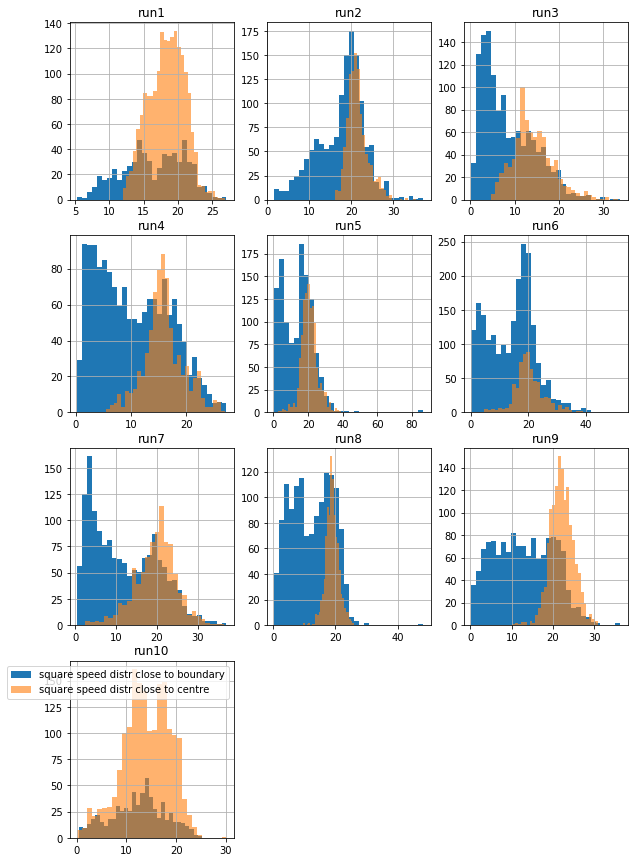

In [913]:
#fig, axes = plt.subplots(ncols=3, nrows=4)

for r in range(1,11):
    
    matplotlib.pyplot.subplot(4, 3, r) 
    R_sq_speed_boundary[r]['v_sq'].replace(0, np.nan).hist(bins=30, label='square speed distr close to boundary',
                                                           figsize=[10,15])
    R_sq_speed_centre[r]['v_sq'].replace(0, np.nan).hist(bins=30, label='square speed distr close to centre', alpha=0.6)
    plt.title('run'+str(r))
    
plt.legend()


In [282]:
len(np.histogram(R_sq_speed_centre[2]['v_sq'].replace(0, np.nan).dropna(),bins=30 )[1] )

31

## Average over 10 realizations

In [312]:
r_speed_centre = {}
r_speed_bound = {}

for i in range(1,11):
    r_speed_centre[i] = pd.concat([ pd.DataFrame( np.histogram(R_sq_speed_centre[i]['v_sq'].replace(0, np.nan).dropna(), bins=30 )[1], columns={'bins'} ),
           pd.DataFrame( np.histogram(R_sq_speed_centre[i]['v_sq'].replace(0, np.nan).dropna() ,bins=30 )[0] , columns={'count'}) 
                                            ], axis=1).set_index('bins')
    r_speed_bound[i] = pd.concat([ pd.DataFrame( np.histogram(R_sq_speed_boundary[i]['v_sq'].replace(0, np.nan).dropna(), bins=30 )[1], columns={'bins'} ),
           pd.DataFrame( np.histogram(R_sq_speed_boundary[i]['v_sq'].replace(0, np.nan).dropna() ,bins=30 )[0] , columns={'count'}) 
                                            ], axis=1).set_index('bins')


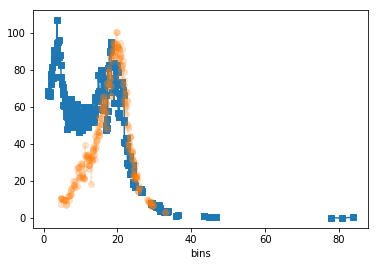

In [917]:
pd.concat(r_speed_bound, axis=1).mean(1).rolling(10).mean().plot(style='s-')
pd.concat(r_speed_centre, axis=1).mean(1).rolling(10).mean().plot(style='o-', alpha=0.2)

In [404]:
 [ [i,  R_sq_speed_centre[i]['v_sq'].mean()] for i in range(1,11) ]

[[1, 18.344107540816726],
 [2, 21.54179223079791],
 [3, 14.104002171243744],
 [4, 15.932980275683853],
 [5, 20.712931711432407],
 [6, 20.371836588342433],
 [7, 19.660588205449315],
 [8, 18.94664943304324],
 [9, 22.117319322800792],
 [10, 13.970037360881257]]

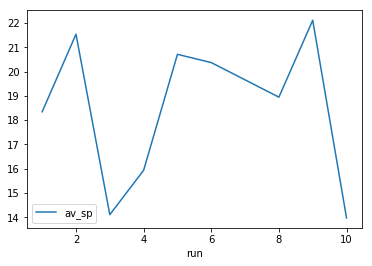

In [407]:
pd.DataFrame( [ [i,  R_sq_speed_centre[i]['v_sq'].mean()] for i in range(1,11) ], 
             columns=['run', 'av_sp']).set_index('run').plot()

In [419]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

0
1   0.113111
2   0.075527
3   0.004879
4   0.001080
5   0.015261
6   0.043436
7   0.009409
8   0.020915
9   0.068863
10  0.000824

In [423]:
sq_vs_ang_speed =  pd.concat([
pd.DataFrame( [ [i,  R_sq_speed_centre[i]['v_sq'].mean()] for i in range(1,11) ], 
             columns=['run', 'av_sp']).set_index('run') ,    
pd.DataFrame(ang_vel_mean_std['mean'].abs().values, index=[i for i in range(1,11)], columns={'ang_sp'} )
], axis=1)

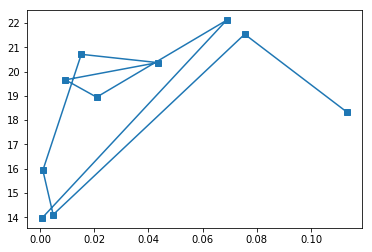

In [426]:
plt.plot(sq_vs_ang_speed['ang_sp'], sq_vs_ang_speed['av_sp'], 's-')

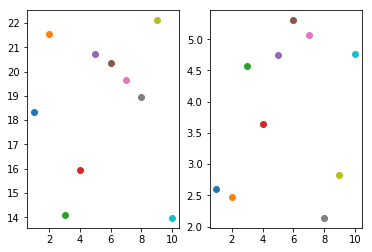

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax2.title('std')

for r in range(1,11):
    ax1.plot(r,  ( R_sq_speed_centre[r]['v_sq'].replace(0, np.nan).mean() ), 'o-', label='mean'  )
    #ax1.title('mean')

    ax2.plot(r,  ( R_sq_speed_centre[r]['v_sq'].replace(0, np.nan).std() ), 'o-', label='mean' )

In [730]:
from pandas.tools.plotting import autocorrelation_plot


In [731]:
many_data['run'+str(i)]['X']

0       327.692830
1       336.250187
2       346.070045
3       355.315556
4       361.371471
5       364.676775
6       368.473094
7       369.866171
8       368.324666
9       364.045761
10      356.852719
11      346.308153
12      332.797880
13      316.852273
14      300.231293
15      284.990091
16      270.984079
17      259.331571
18      252.141132
19      248.655147
20      247.456506
21      248.673653
22      254.007582
23      261.867117
24      272.468441
25      285.606107
26      300.641938
27      316.860061
28      333.067873
29      348.722388
           ...    
2970           NaN
2971           NaN
2972           NaN
2973           NaN
2974           NaN
2975           NaN
2976           NaN
2977           NaN
2978           NaN
2979           NaN
2980           NaN
2981           NaN
2982           NaN
2983           NaN
2984           NaN
2985           NaN
2986           NaN
2987           NaN
2988           NaN
2989           NaN
2990           NaN
2991        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


(1, 100)

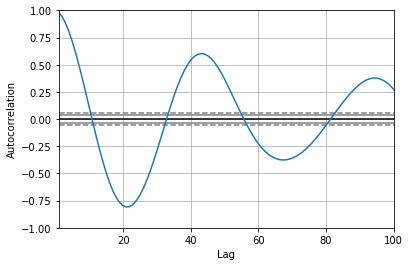

In [736]:
autocorrelation_plot(speed[1]['X'].replace(0, np.nan).dropna() )
plt.xlim(1,100)

In [758]:
def acf(x, length=100):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  for i in range(1, length)])


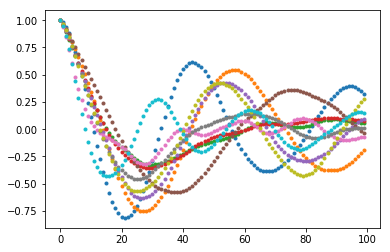

In [795]:
for i in range(1,11):
    plt.plot(acf(speed[i]['X'].replace(0, np.nan).dropna() ), '.' )

In [806]:
max_acorr = {}
for i in range(1,11):
    max_acorr[i] = pd.DataFrame( acf(speed[i]['X'].replace(0, np.nan).dropna() ) ).loc[20:].idxmax() 
            #0.5*( pd.DataFrame( acf(speed[i]['X'].replace(0, np.nan).dropna() ) ) + 
            #     pd.DataFrame( acf(speed[i]['Y'].replace(0, np.nan).dropna() ) ) ).idxmax()

In [814]:
max_acorr_df = pd.DataFrame(max_acorr).transpose().rename(columns={0:'max_acorr'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys


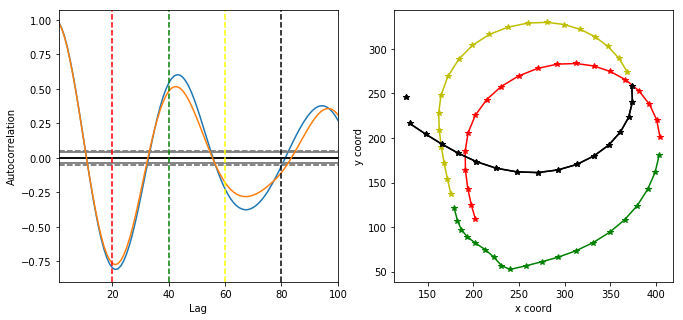

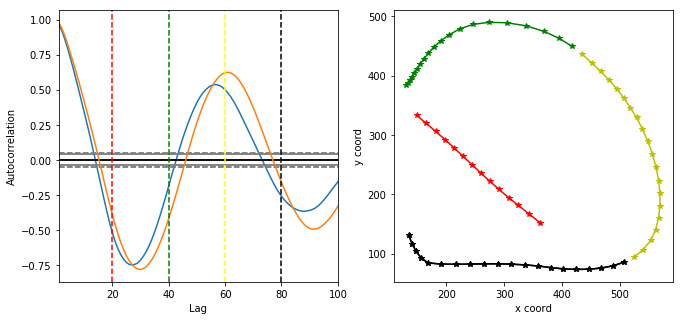

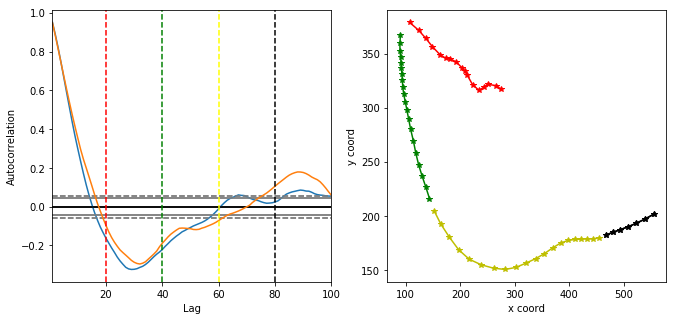

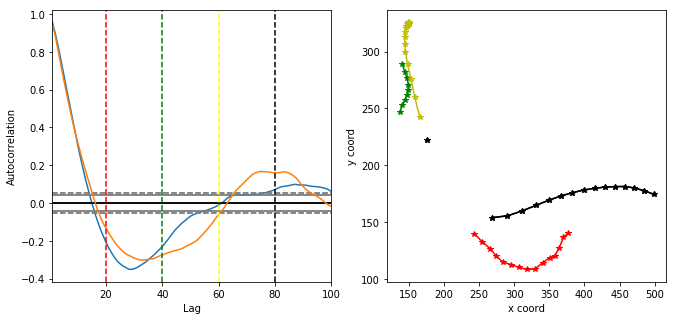

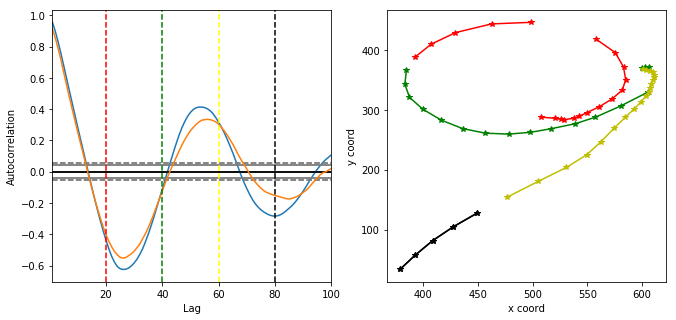

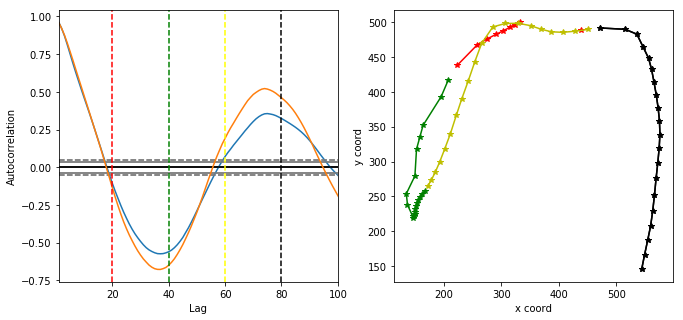

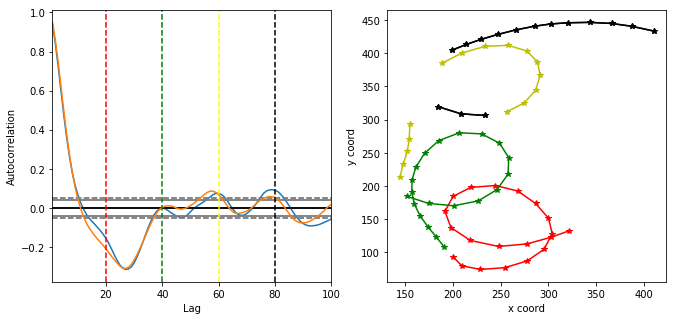

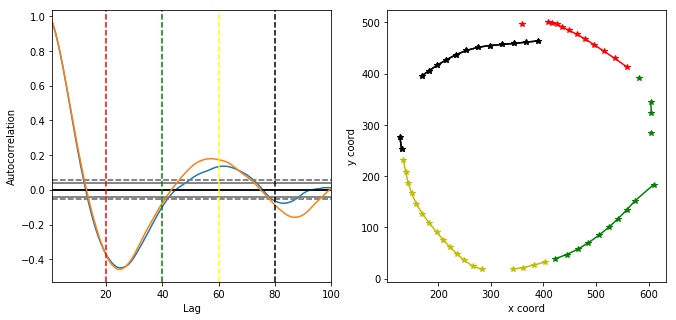

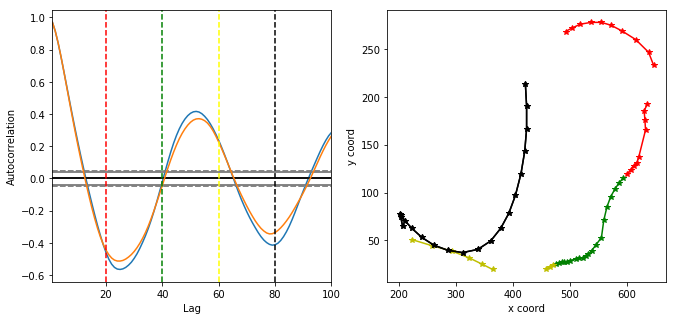

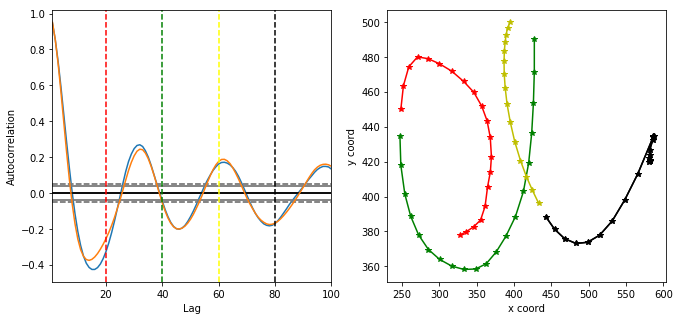

In [54]:

for r in range(1,11): 
    fig = plt.figure(figsize=[11,5])
    ax1 = fig.add_subplot(121)

    autocorrelation_plot(speed[r]['X'].replace(0, np.nan).dropna(), ax=ax1)
    autocorrelation_plot(speed[r]['Y'].replace(0, np.nan).dropna(), ax=ax1)
    ax1.axvline(x=20, linestyle='--', color='red')
    ax1.axvline(x=40, linestyle='--', color='green')
    ax1.axvline(x=60, linestyle='--', color='yellow')
    ax1.axvline(x=80, linestyle='--', color='black')

    plt.xlim(1,100)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(many_data['run'+str(r)]['X'].iloc[:20], many_data['run'+str(r)]['Y'].iloc[:20], 'r*-')
    ax2.plot(many_data['run'+str(r)]['X'].iloc[20:40], many_data['run'+str(r)]['Y'].iloc[20:40], 'g*-')
    ax2.plot(many_data['run'+str(r)]['X'].iloc[40:60], many_data['run'+str(r)]['Y'].iloc[40:60], 'y*-')
    ax2.plot(many_data['run'+str(r)]['X'].iloc[60:80], many_data['run'+str(r)]['Y'].iloc[60:80], 'k*-')
    ax2.plot(many_data['run'+str(r)]['X'].iloc[60:80], many_data['run'+str(r)]['Y'].iloc[60:80], 'k*-')

    ax2.set_xlabel('x coord')
    ax2.set_ylabel('y coord')

    plt.show()

## get peak correlation 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


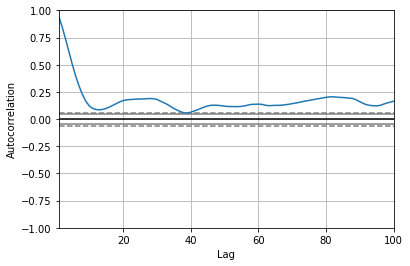

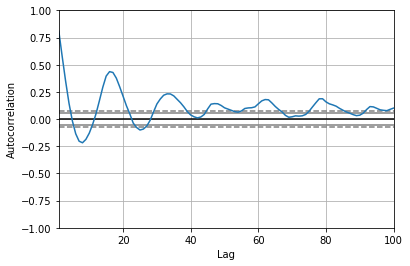

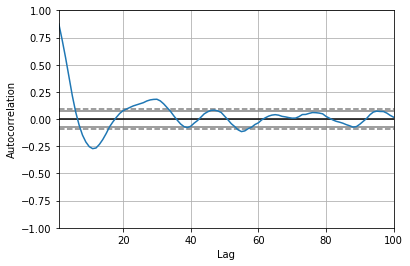

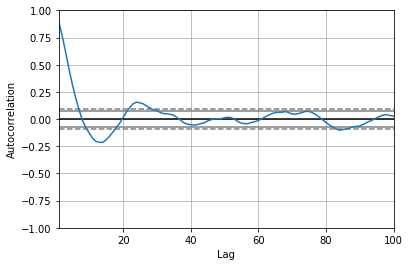

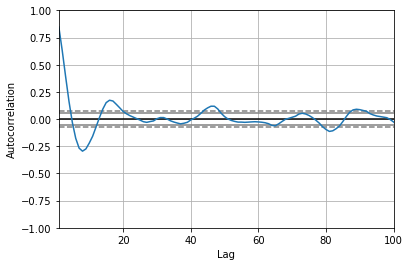

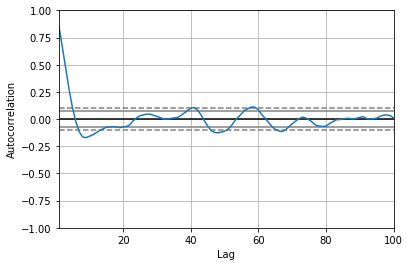

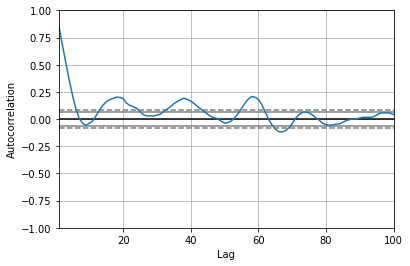

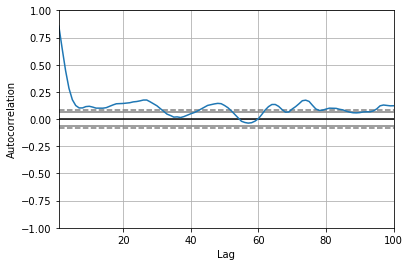

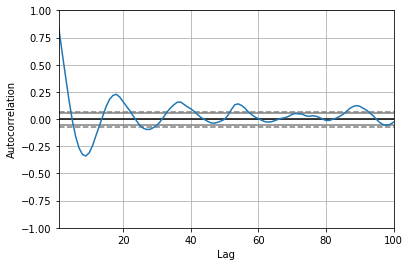

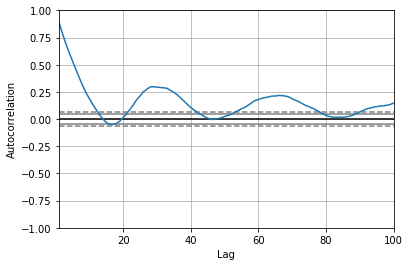

In [55]:

for r in range(1,11): 
    autocorrelation_plot(R_sq_speed_centre[r]['v_sq'].replace(0, np.nan).dropna())

    #speed[r]['X']
    #speed[r]['Y']
    plt.xlim(1,100)
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


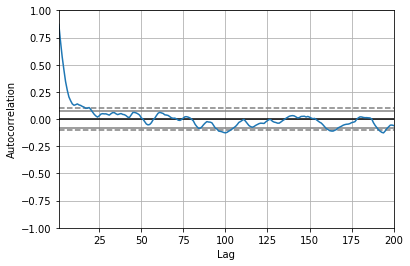

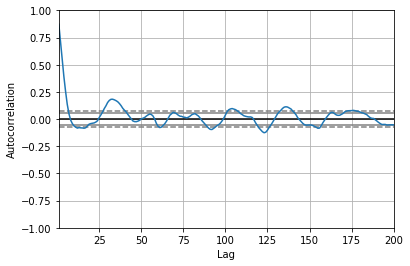

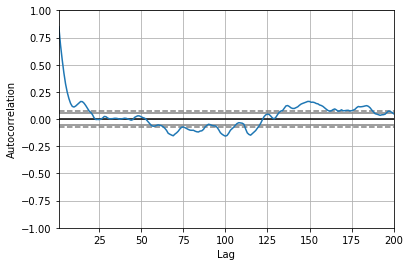

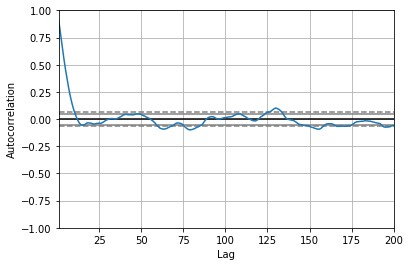

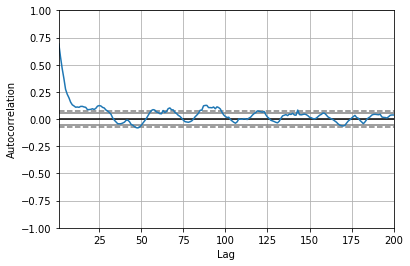

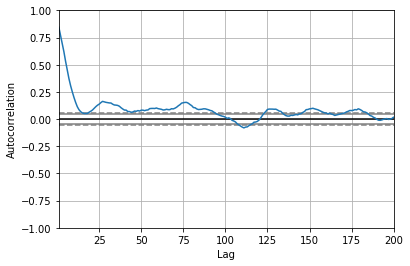

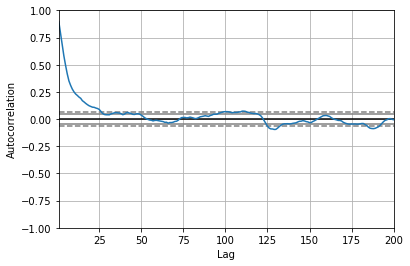

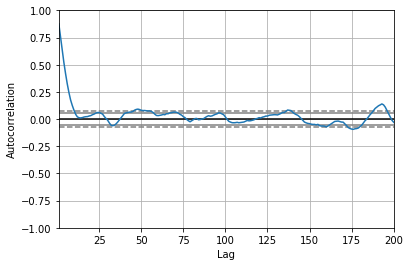

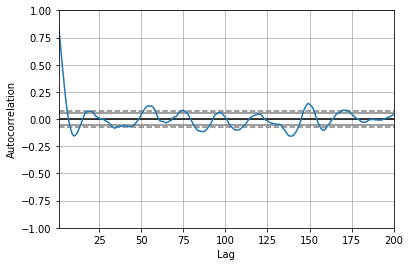

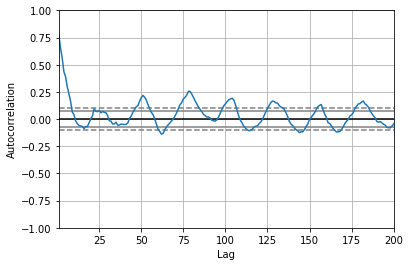

In [56]:
for r in range(1,11): 
    autocorrelation_plot(R_sq_speed_boundary[r]['v_sq'].replace(0, np.nan).dropna())
    plt.xlim(1,200)
    plt.show()

In [57]:
R_sq_speed_boundary_centre = pd.concat([R_sq_speed_boundary_df, R_sq_speed_centre_df], axis=1, keys=['boundary', 'center'])    


In [58]:
sq_speed_df = pd.concat([sq_speed[i] for i in range(1,11) ], axis=1, keys=['run'+ str(i) for i in range(1,11)])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fea65f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a202eb8d0>]], dtype=object)

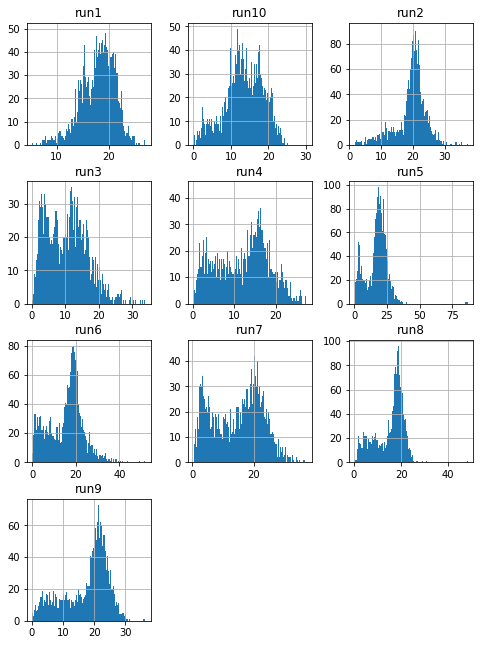

In [59]:
sq_speed_df.hist(bins=160,  figsize=[8,11])

In [60]:
from pandas.tools.plotting import autocorrelation_plot
#import pandas.plotting.autocorrelation_plot

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


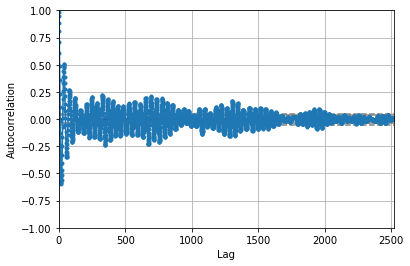

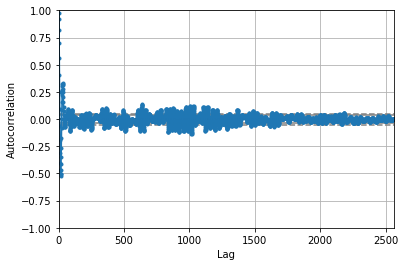

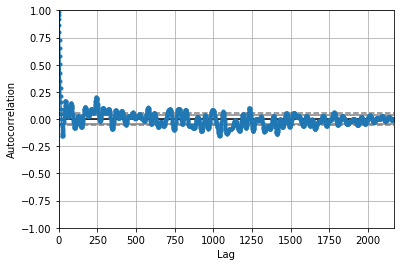

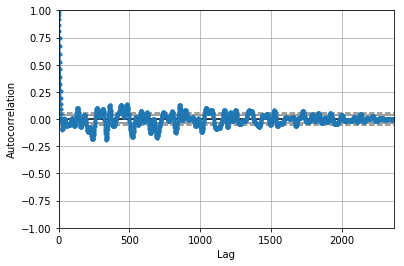

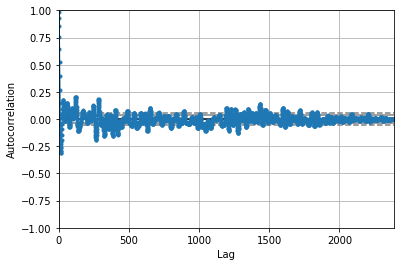

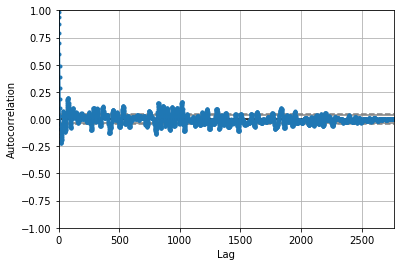

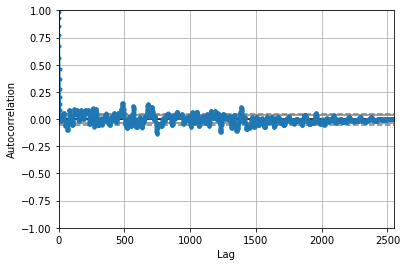

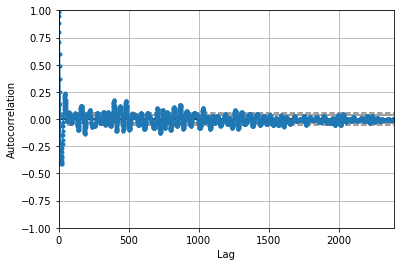

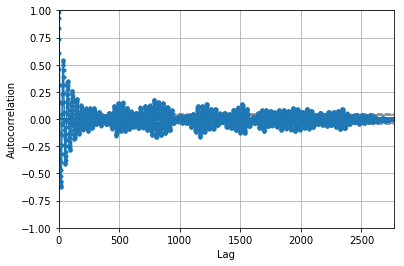

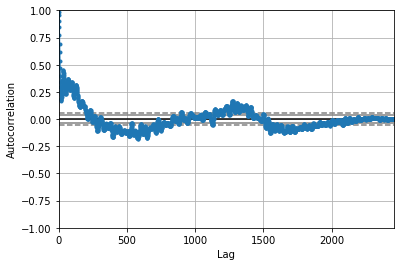

In [61]:
for i in range(1,11):
    
    #matplotlib.pyplot.subplot(4, 3, i) 

    autocorrelation_plot(Radial_pos[i].iloc[0:3000].dropna(),marker='.')
    plt.show()
    

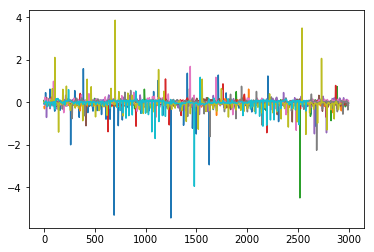

In [62]:
for i in range(1,11):
    ang_vel[i]['ang_vel'].plot()

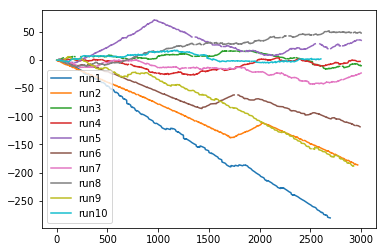

In [63]:
for i in range(1,11):
    ang_vel[i]['ang_vel'].cumsum().plot(label='run'+str(i))
    plt.legend()
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


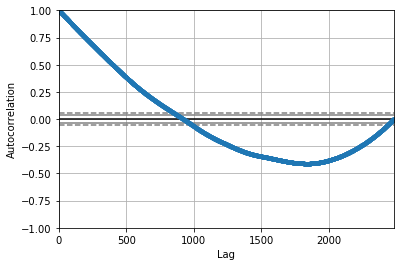

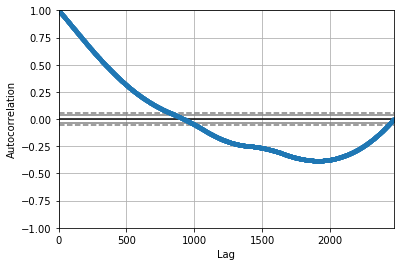

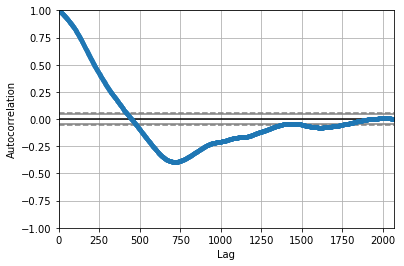

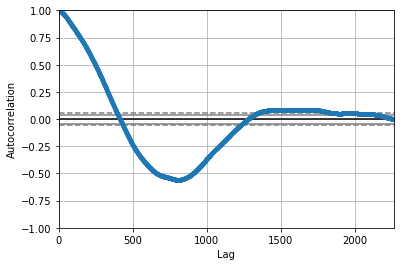

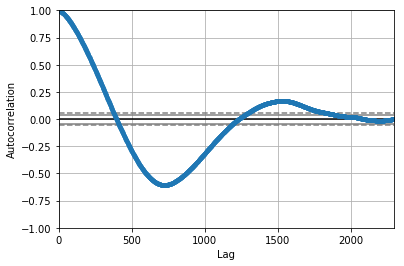

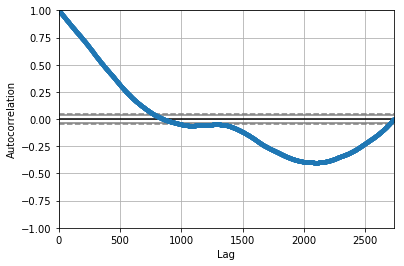

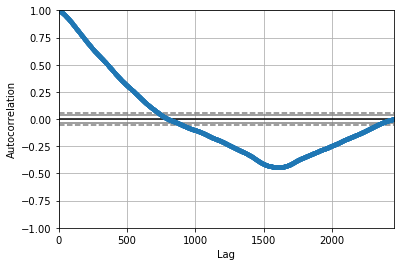

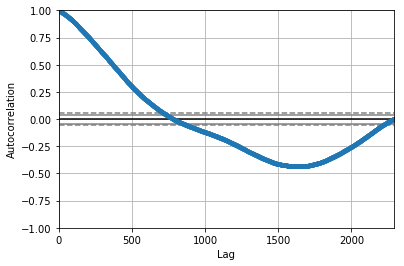

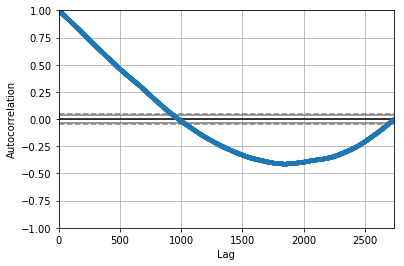

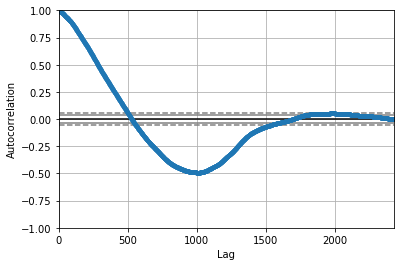

In [64]:
for i in range(1,11):
    autocorrelation_plot(ang_vel[i]['ang_vel'].cumsum().dropna(),marker='.')
    plt.show()


In [427]:
def computeMSD2(trajectory, t_step):
    
    delays = trajectory.index.copy()
    shifts = np.floor(delays/t_step).astype(np.int)
    msds = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = trajectory - trajectory.shift(-shift)
        sqdist = np.square(diffs)
        msds[i] = sqdist.mean()
    return delays, msds


In [428]:
Radial_pos[2].dropna().index.copy()[:100]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
             32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
             45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
             58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
             71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
             84,  85,  86,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
            109, 110, 111, 112, 113, 114, 115, 116, 117],
           dtype='int64')

In [429]:
delays = {}
msd_new = {}
for i in range(1,11):
    delays[i] , msd_new[i] =  computeMSD2(Radial_pos[i].dropna(), 1) 
    

In [430]:
time = {}
for i in range(1,11):
    time[i] = np.arange(len(msd_new[i]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


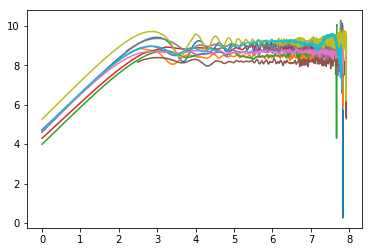

In [431]:
for i in range(1,11):
    plt.plot(np.log(delays[i]), np.log(msd_new[i]))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


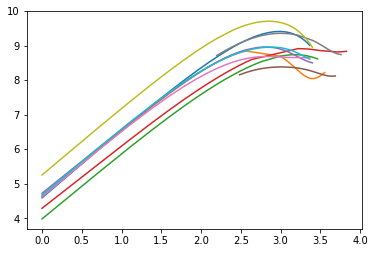

In [432]:
for i in range(1,11):
    plt.plot(np.log(delays[i][:30]), np.log(msd_new[i][:30]))


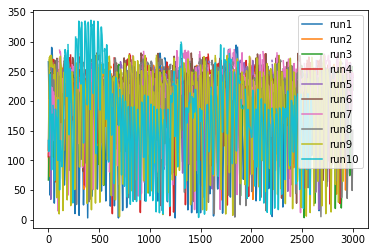

In [433]:
for i in range(1,11):
    Radial_pos[i].plot(label='run'+str(i))
    plt.legend()


In [434]:
delays[2][:20]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23, 24,
            25],
           dtype='int64')

In [435]:
delays[i]

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602],
           dtype='int64', length=2455)

In [437]:
MSD = pd.concat( [pd.DataFrame({'run'+str(i): msd_new[i]} ).set_index(delays[i]) for i in range(1,11)], axis=1 )

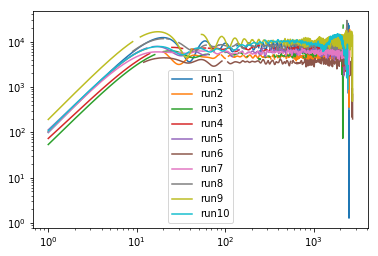

In [438]:
(MSD).plot()
plt.yscale('log')
plt.xscale('log')

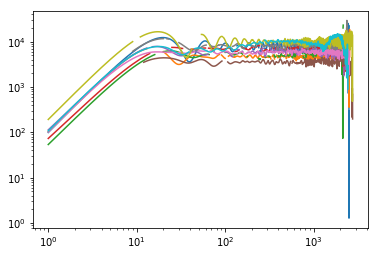

In [77]:
for i in MSD.keys():
    plt.plot(MSD[i]-MSD[i].dropna().iloc[0])
    plt.yscale('log')
    plt.xscale('log')

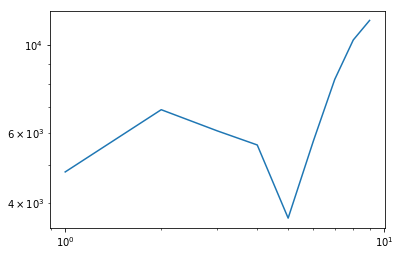

In [477]:
MSD.iloc[1300:2100].mean().plot()
plt.yscale('log')
plt.xscale('log')

In [487]:
plateau_MSD = pd.DataFrame( MSD.iloc[1300:2100].mean().values,
            #
             columns={'plateau'}, 
             index= [i for i in range(1,11)]
            ) 

In [490]:
ang_sp_vs_plateau = pd.concat( [sq_vs_ang_speed['ang_sp'], plateau_MSD], axis=1 )

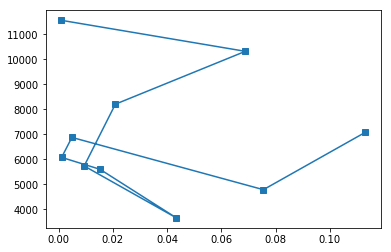

In [493]:
plt.plot(ang_sp_vs_plateau['ang_sp'], ang_sp_vs_plateau['plateau'], 's-' )

In [823]:
persist_vs_plateau.set_index('max_acorr')

plateau
max_acorr              
43          7082.160576
57          4789.557313
89          6879.057135
87          6080.517747
54          5603.186919
75          3660.826909
79          5737.142499
62          8207.536483
52         10320.621633
32         11563.244559

In [825]:
fit_plat

fit_plateau
index             
1      7307.302751
2      4436.517386
3      4805.615412
4      6840.082864
5      5460.188971
6      4125.048026
7      5427.627707
8      8023.659490
9      9715.178723
10     6168.489768

max_acorr     fit_plat
1          43  7307.302751
2          57  4436.517386
3          89  4805.615412
4          87  6840.082864
5          54  5460.188971
6          75  4125.048026
7          79  5427.627707
8          62  8023.659490
9          52  9715.178723
10         32  6168.489768

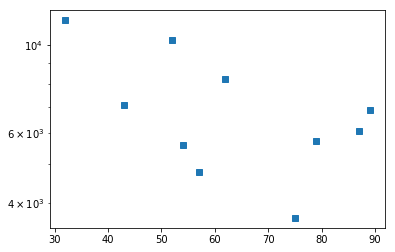

In [837]:
persist_vs_plateau = pd.concat( [max_acorr_df['max_acorr'], plateau_MSD], axis=1 )
plt.plot(persist_vs_plateau['max_acorr'], persist_vs_plateau['plateau'], 's' )

#persist_vs_fit_plateau = pd.concat( [max_acorr_df['max_acorr'], pd.DataFrame(fit_plat.values, 
#                                                    index=[i for i in range(1,11)], columns={'fit_plat'} ) ], axis=1 )
#plt.plot(persist_vs_fit_plateau['max_acorr'], persist_vs_fit_plateau['fit_plat'], 'o' )
plt.yscale('log')

In [840]:
type(persist_vs_plateau['max_acorr'])

pandas.core.series.Series

In [851]:
persist_vs_plateau['max_acorr'].reshape(-1, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[43],
       [57],
       [89],
       [87],
       [54],
       [75],
       [79],
       [62],
       [52],
       [32]])

In [863]:
#mix = 
mix = pd.concat([persist_vs_plateau['max_acorr'], persist_vs_plateau['plateau']], axis=1).set_index('max_acorr').sort_index()

In [868]:
mix.index.values

array([32, 43, 52, 54, 57, 62, 75, 79, 87, 89])

In [878]:
from sklearn.linear_model import LinearRegression
X = mix.index.values.reshape(-1, 1)
y = mix['plateau'].reshape(-1, 1)
reg = LinearRegression().fit(X, y)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [879]:
M = reg.coef_

In [880]:
C = reg.intercept_ 

(1, 16000)

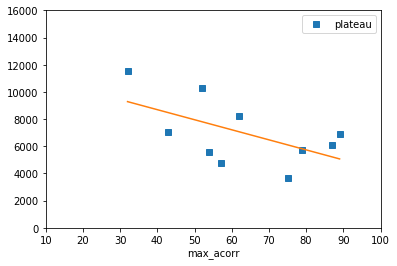

In [888]:
mix.plot(style='s')
plt.plot(X,  C+ M*X)
plt.xlim(10,100)
plt.ylim(1,16000)

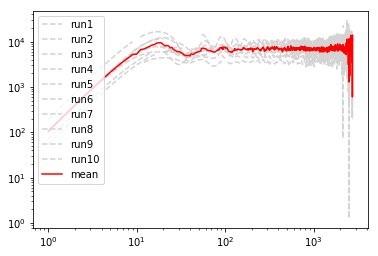

In [499]:
for i in range(1,11):
    MSD['run'+str(i)].plot(color='lightgrey', linestyle='--')
    plt.yscale('log')
    plt.xscale('log')
    
MSD.mean(1).plot(color='red', label='mean') 
plt.legend()

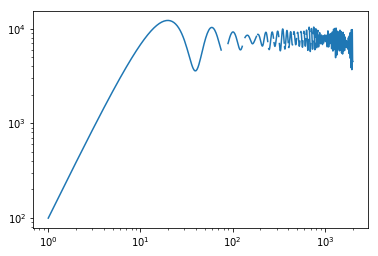

In [500]:
MSD['run1'].iloc[:2000].plot()
plt.yscale('log')
plt.xscale('log')


## Analytical sol 

In [501]:
def func(x, A, omega1, T):

    return A*(1- np.exp(-2*x/T)*( np.cos( omega1*x ) +  (1/(2*T*omega1))* np.sin( omega1*x ) ) )


In [502]:
from scipy.optimize import curve_fit


## set manually the number of points to fit 

In [516]:
datapointsfit = dict()

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


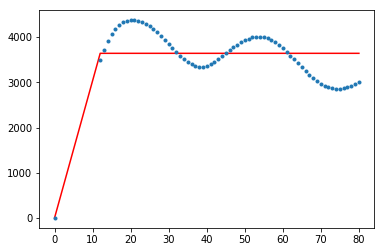

In [692]:
    dataMSD = {}
    popt = {}
    pcov = {}

    i = 6
    dataMSD[i] = MSD['run'+str(i)].dropna().loc[0:80]

    x = dataMSD[i].index
    y = dataMSD[i].values
    index = ~(np.isnan(x) | np.isnan(y))
    
    #popt[i], pcov[i] = curve_fit(func, x[index] , y[index])
    #plt.plot(x[index], func(x[index], *popt[i]), 'r-' )
    #plt.plot(x[index], y[index] , '.' )
  
    popt[i], pcov[i] = curve_fit(func, dataMSD[i].dropna().index , dataMSD[i].dropna().values,
                                 maxfev=32000
                                 #bounds=(0, [8000., 30., 200.]) 
                                )
    plt.plot(dataMSD[i].index, func(dataMSD[i].index, *popt[i]), 'r-' )
    plt.plot(dataMSD[i].index, dataMSD[i].values , '.' )


In [689]:
datapointsfit[1] = 128
datapointsfit[2] = 48

datapointsfit[3] = 60
#162

datapointsfit[4] = 181
datapointsfit[5] = 61 

datapointsfit[6] = 30 
#50 

datapointsfit[7] = 50 

datapointsfit[8] = 60 
datapointsfit[9] = 79 
datapointsfit[10] = 98 

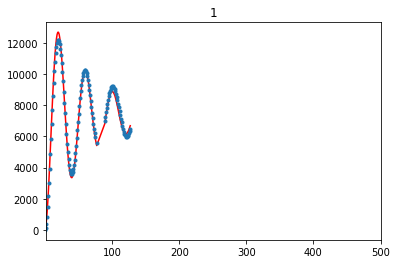

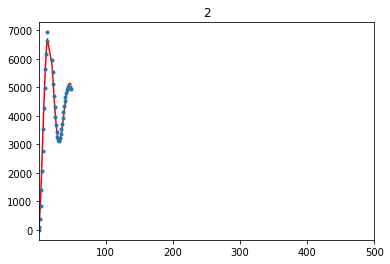

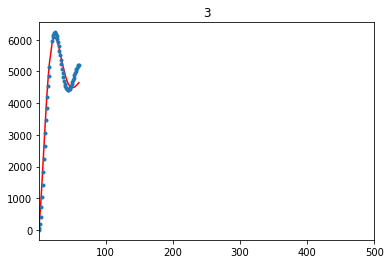

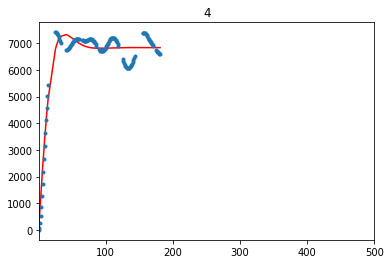

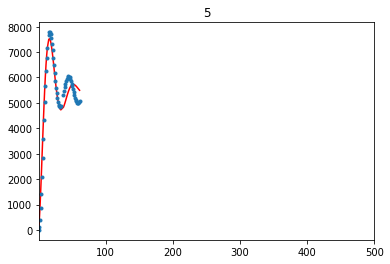

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


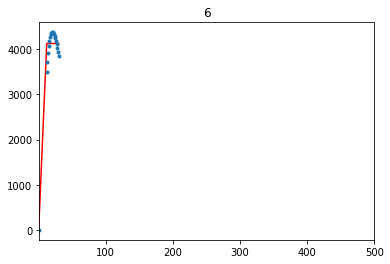

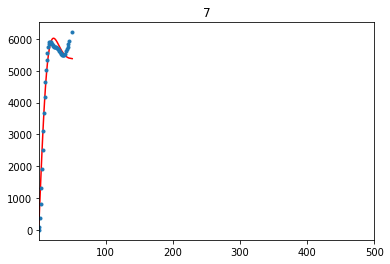

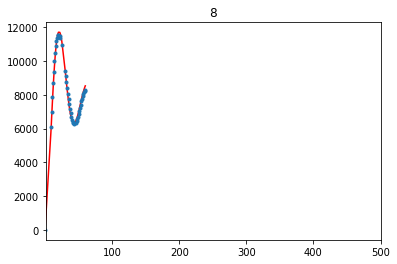

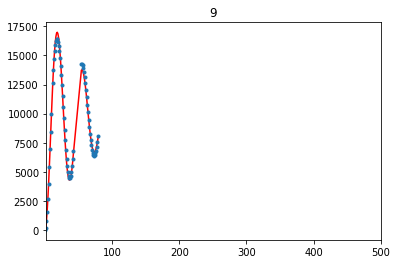

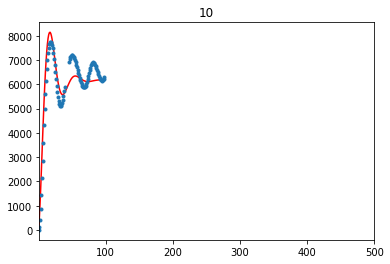

In [718]:
dataMSD = {}
popt = {}
pcov = {}

for i in range(1,11):
    dataMSD[i] = MSD['run'+str(i)].dropna().loc[:#2000]
                                                datapointsfit[i]]#.fillna(method='bfill')
    
    x = dataMSD[i].index
    y = dataMSD[i].values
    index = ~(np.isnan(x) | np.isnan(y))
    
    #popt[i], pcov[i] = curve_fit(func, x[index] , y[index])
    #plt.plot(x[index], func(x[index], *popt[i]), 'r-' )
    #plt.plot(x[index], y[index] , '.' )
  
    popt[i], pcov[i] = curve_fit(func, dataMSD[i].dropna().index , dataMSD[i].dropna().values,
                                 maxfev=20000
                                 #bounds=(0, [8000., 30., 200.]) 
                                )
    plt.plot(dataMSD[i].index, func(dataMSD[i].index, *popt[i]), 'r-' )
    plt.plot(dataMSD[i].index, dataMSD[i].values , '.' )
    plt.title(i)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlim(1,500)
    plt.show()

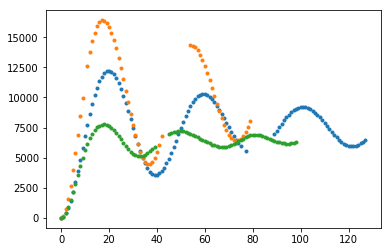

In [719]:
plt.plot(dataMSD[1].index, dataMSD[1].values , '.' )
plt.plot(dataMSD[9].index, dataMSD[9].values , '.' )
plt.plot(dataMSD[10].index, dataMSD[10].values , '.' )


In [720]:
popt[1]

array([ 7307.30275053,    12.4105789 ,   130.58090304])

In [721]:
popt[9]

array([ 9715.17872265,    31.24551391,   126.23281421])

In [722]:
popt[10]

array([ 6168.4897679 ,    18.68374503,    31.39323928])

## check result fit 

### plateau fit vs measured

In [723]:
fit_plat = pd.DataFrame(  [[i, popt[i][0]] for i in range(1,11)], columns=['index', 'fit_plateau']).set_index('index')

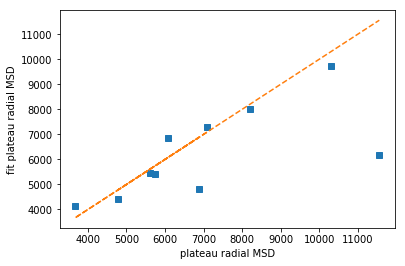

In [724]:
plt.plot(plateau_MSD.values, fit_plat.values, 's')
plt.ylabel('fit plateau radial MSD')
plt.xlabel('plateau radial MSD')

plt.plot(plateau_MSD.values, plateau_MSD.values, '--')

Text(0.5,1,'mean :6231.0 std :1758.0')

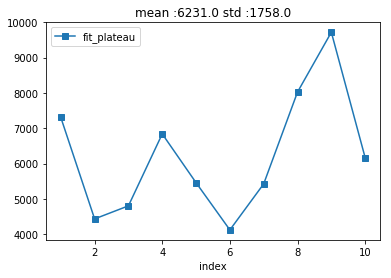

In [942]:
fit_plat.plot(style='s-')
plt.title( 'mean :'+str(np.round(fit_plat.mean().values[0]) )+ ' std :'+str(np.round(fit_plat.std().values[0]) ) )

### timescale should be homogeneous 

In [725]:
timesc = pd.DataFrame(  [[i, popt[i][2]] for i in range(1,11)], columns=['index', 'fit_timescale']).set_index('index')

Text(0.5,1,'mean :53.0 std :43.0')

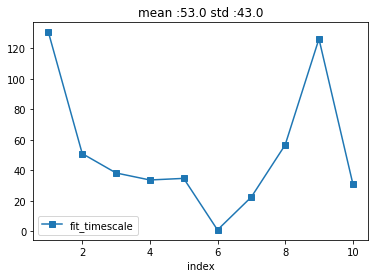

In [938]:
timesc.plot(style = 's-')
plt.title( 'mean :'+str(np.round(timesc.mean().values[0]) )+ ' std :'+str(np.round(timesc.std().values[0]) ) )

In [934]:
np.round(timesc.mean().values[0])

53.0

In [923]:
timesc.std()

fit_timescale    42.70676
dtype: float64

## oscillations 

In [727]:
fit_omega1 = pd.DataFrame(  [[i, popt[i][1]] for i in range(1,11)], columns=['index', 'fit_oscill']).set_index('index')

Text(0.5,1,'mean :13.0 std :10.0')

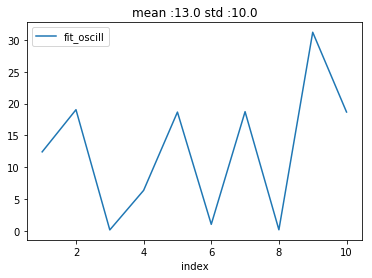

In [939]:
fit_omega1.plot()

plt.title( 'mean :'+str(np.round(fit_omega1.mean().values[0]) )+ ' std :'+str(np.round(fit_omega1.std().values[0]) ) )

In [920]:
fit_omega1.mean()

fit_oscill    12.640166
dtype: float64

In [921]:
fit_omega1.std()

fit_oscill    10.464749
dtype: float64

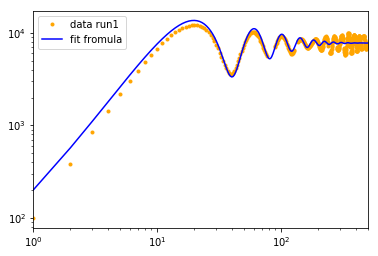

In [696]:
data = MSD['run1'].iloc[:2000]

x0 = 0

x = data.index
#np.arange(0,2500, 1)
T = 144.02867819 
##60
omega1 = 12.412
#0.15
y = 7773.7*(1- np.exp(-2*x/T)*( np.cos( omega1*x ) +  (1/(2*T*omega1))* np.sin( omega1*x ) ) )

(data 
 #/MSD['run1'].rolling(30).mean().iloc[2000]
) .plot(style='.', label ='data run1', color='orange')

plt.plot(( x), (y), '-', label ='fit fromula', color='blue')

plt.yscale('log')
plt.xscale('log')
plt.xlim(1,500)
plt.legend()

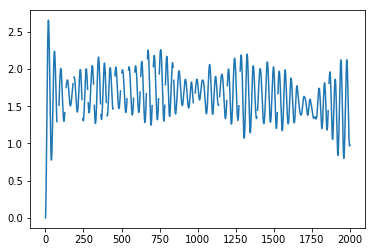

In [116]:
(MSD['run1'].iloc[:2000]/MSD['run1'].iloc[2000]) .plot()

In [944]:
def computeMSD_angle(trajectory, t_step):
    
    delays = trajectory.frame.copy()
    shifts = np.floor(delays/t_step).astype(np.int)
    msds = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = trajectory.ang_vel.cumsum() - trajectory.ang_vel.cumsum().shift(-shift)
        sqdist = np.square(diffs)
        msds[i] = sqdist.mean()
    return delays, msds


In [945]:
(ang_vel[i]['ang_vel']).dropna().index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694],
           dtype='int64', length=2481)

In [946]:
dela = {}
res_theta = {}
for i in range(1,11):
    
    dela[i], res_theta[i] =  computeMSD_angle( (ang_vel[i]).dropna(),1) 

In [947]:
MSD_theta = pd.concat( [pd.DataFrame({'run'+str(i): res_theta[i]} ).set_index(dela[i]) for i in range(1,11)], axis=1 )

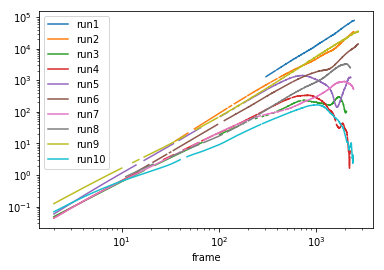

In [948]:
MSD_theta.plot()
plt.yscale('log')
plt.xscale('log')
plt.legend()

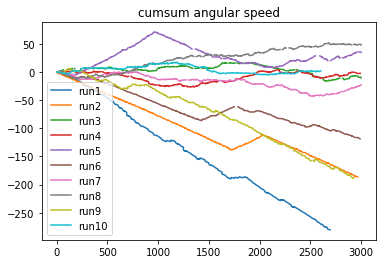

In [949]:
for i in range(1,11):
    ang_vel[i]['ang_vel'].cumsum().plot(label='run'+str(i), title='cumsum angular speed')
    plt.legend()


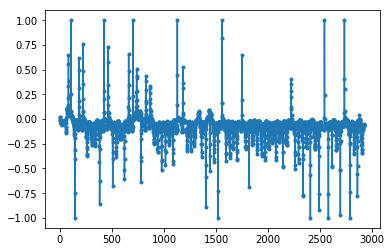

In [86]:
ang_vel[9]['ang_vel'].clip(-1,1).plot(style='.-')

In [964]:
mean_omega =  pd.DataFrame([(ang_vel[i]['ang_vel'].mean() )**2 for i in range(1,11) ] ).mean().values


In [966]:
mean_omega[0]

0.0025911694904792882

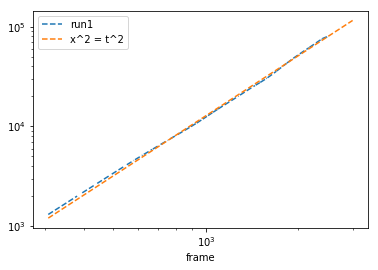

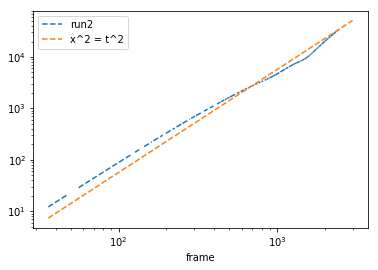

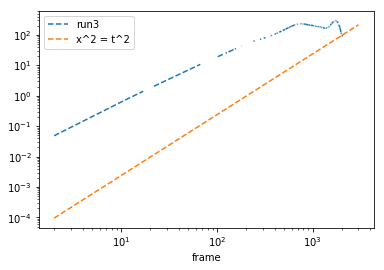

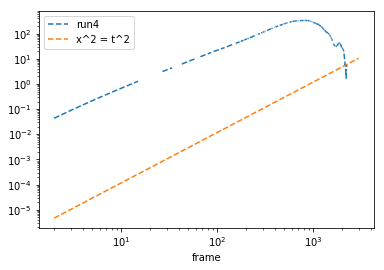

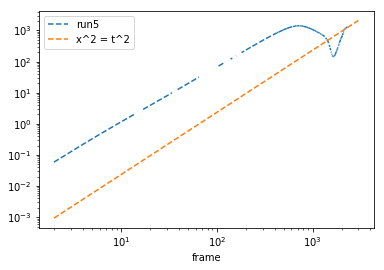

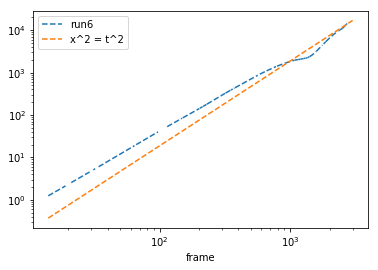

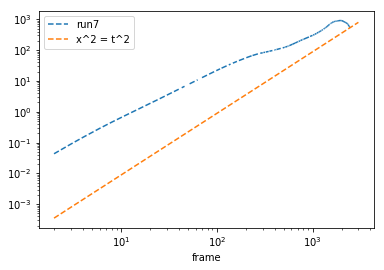

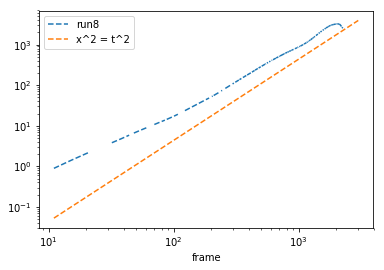

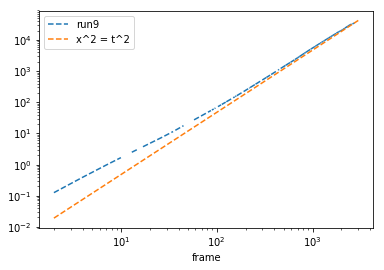

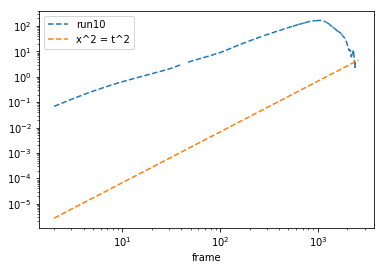

In [959]:
for i in range(1,11):
    MSD_theta['run'+str(i)].plot(linestyle='--')
    plt.plot(dela[i], (ang_vel[i]['ang_vel'].mean())**2*dela[i]**2, '--', label='x^2 = t^2')

    plt.yscale('log')
    plt.xscale('log')
    
#MSD_theta.mean(1).plot(color='red', label='mean') 

#plt.plot(2*dela[i], 0.05*dela[i], '--', label='x^2 = t')

    plt.legend()
    plt.show()

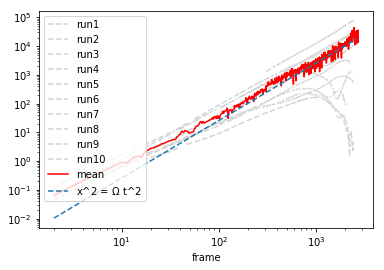

In [972]:
for i in range(1,11):
    MSD_theta['run'+str(i)].plot(color='lightgrey', linestyle='--')
    plt.yscale('log')
    plt.xscale('log')
    
MSD_theta.mean(1).plot(color='red', label='mean') 

#plt.plot(2*dela[i], 0.5*dela[i]**2, '--', label='x^2 = t^2')
#plt.plot(2*dela[i], 0.05*dela[i], '--', label='x^2 = t')

plt.plot(dela[i], mean_omega[0]*dela[i]**2, '--', label='x^2 = $\Omega$ t^2')

plt.legend()

In [242]:
def cond_exp(x, y, nbins=30):
    means = []
    error = []
    bins_out = []
    xa = np.array(x)
    ya = np.array(y)
    ymin = min(ya)
    ymax = max(ya)
    bins = np.array([ (ymin+ i*(ymax-ymin))/float(nbins) for i in range(0,nbins+1) ])
    
    for i in range(0, nbins):
        temp = xa[(ya>bins[i])*(ya<=bins[i+1])]
        if len(temp)>=2:
            m = np.mean(temp)
            means+=[m]
            error+=[ np.std(temp)/np.sqrt(len(temp)-1) ]
            bins_out += [(bins[i] + bins[i+1])/2.0]
    return np.array(bins_out), np.array(means), np.array(error)


In [89]:
radial_vel[9]

0             NaN
1       10.723709
2       15.899118
3       18.861904
4       17.482427
5       16.725407
6       19.018117
7       24.312384
8       23.018027
9        9.932301
10            NaN
11            NaN
12      -3.329879
13       4.172668
14       4.669185
15       0.328880
16      -0.119097
17      -3.591643
18      -2.049403
19      -3.091815
20      -3.364131
21      -3.201696
22      -1.728908
23      -0.704481
24       2.284910
25       5.982670
26      10.512968
27      -0.128743
28       0.293022
29      -0.247908
          ...    
2896   -15.261155
2897   -15.180855
2898   -12.060145
2899    -7.628271
2900    -2.711481
2901     0.846869
2902     3.015774
2903     6.052398
2904     8.564301
2905     9.600286
2906    10.320349
2907    11.243772
2908    12.661159
2909    13.398439
2910    14.295965
2911    15.468684
2912    15.976097
2913    16.344001
2914    15.896721
2915    14.875864
2916          NaN
2917          NaN
2918          NaN
2919    -2.022544
2920    -2

In [90]:
d = {}
e = {}
f = {}
for i in range(1,11): 
    d[i], e[i], f[i] = cond_exp(  radial_vel[i].abs() , Radial_pos[i],  nbins=200)

    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':


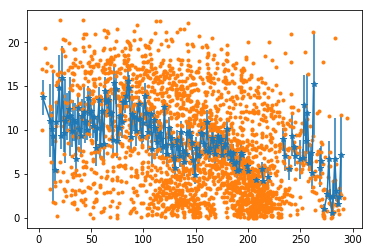

In [91]:
plt.errorbar(d[1], e[1], f[1], marker='*')

plt.plot( Radial_pos[1], radial_vel[1].abs(), '.' )

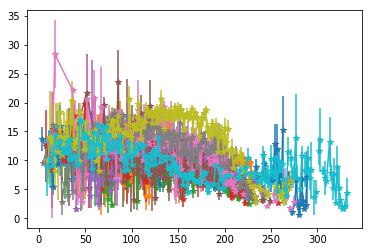

In [92]:
for i in range(1,11):
    plt.errorbar(d[i], e[i], f[i], marker='*')

    

In [93]:
v_profile = pd.concat( [ pd.DataFrame({'run'+str(i): e[i]} ).set_index(d[i]) for i in range(1,11)], axis=1 )

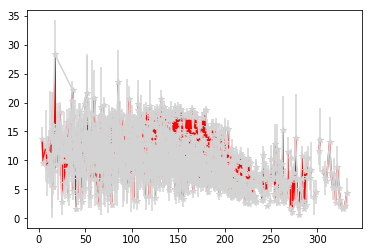

In [94]:
v_profile.mean(1).plot(color='red')
for i in range(1,11):
    plt.errorbar(d[i], e[i], f[i], marker='*', color='lightgray')


In [95]:
print(len(radial_vel[i]))

2603


In [96]:
print(len(ang_vel[i]['ang_vel'].cumsum()))

2603


In [97]:
u = {}
v = {}
z = {}
for i in range(1,11): 
    u[i], v[i], z[i] = cond_exp(  radial_vel[i].abs() , ang_vel[i]['ang_vel'].cumsum(),  nbins=200)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':


In [98]:
for i in range(1,11):
    plt.errorbar(a[i], b[i], c[i], marker='*')
plt.xlim(0,160)

NameError: name 'a' is not defined

In [ ]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))


In [ ]:
cross_corr = [crosscorr(radial_vel[9], ang_vel[9]['ang_vel'], lag=i) for i in range(1000)]


In [ ]:
plt.plot( cross_corr )